# Mathematical Foundations for Computer Science
# RNN’s Backpropagation Through Time

Instructor: Pro. Nguyen An Khuong

Students:

*   Le Cong Tu - 2570367
*   Le Nguyen Gia Nghi - 2570264
*   Nguyen Nhat Duy - 2570040
*   Tran Thi Van Anh - 2570394



# 1. Introduction
# 1.1 History of Model Development
### 1.1.1 Autoregressive Models

Autoregressive models predict the value of a signal at a given time step using past values of the same signal. However, a challenge arises because the number of inputs varies depending on the time step. This means that, as new data points are encountered, the number of features in the model grows, which leads to complexity when dealing with varying input lengths.



### Two Main Strategies

#### **1) Windowing Approach**
One strategy is to limit the number of past observations used by conditioning on a fixed window of length τ. This allows for a consistent input size for the model, regardless of how far back in the past the model looks. This simplifies training by using fixed-length vectors.

#### **2) Latent Autoregressive Models**
The second strategy involves maintaining a hidden state that summarizes the past observations and updates it along with the prediction at each time step.

$\hat{x}_t = P(x_t \mid h_t)$

The hidden state is updated using a function:
$$
h_t = g(h_{t-1}, x_t)
$$

The hidden state is never directly observed → **latent autoregressive model**.


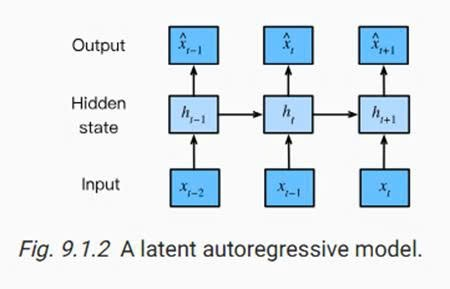

- **Inputs:** current and past values $(x_t, x_{t-1}, \ldots)$  
- **Hidden state:** A summary of the past observations that evolves over time and is updated at each step.  
- **Output:** predicted value of signal $\hat{x}_t$

### 1.1.2 Sequence Model and Learning Language Model

In long sequences, **n-grams** approximate the dependence structure by truncation.  
To compute a language model, we must estimate:

- the probability of words  
- conditional probability of a word given previous words  

$$
P(x_1, x_2, x_3, x_4)
= P(x_1)P(x_2)P(x_3)P(x_4),
$$

$$
P(x_1, x_2, x_3, x_4)
= P(x_1)P(x_2 \mid x_1)P(x_3 \mid x_2)P(x_4 \mid x_3),
$$

$$
P(x_1, x_2, x_3, x_4)
= P(x_1)P(x_2 \mid x_1)P(x_3 \mid x_1, x_2)P(x_4 \mid x_2, x_3).
$$


These are the **parameters of the language model**.

However, n-grams suffer from **data sparsity**.  
There is structure in language, but insufficient frequency for rare combinations → smoothing required (e.g., Laplace).

$$
\hat{P}(x)
= \frac{n(x) + \epsilon_1/m}{n + \epsilon_1},
$$

$$
\hat{P}(x' \mid x)
= \frac{n(x, x') + \epsilon_2 \hat{P}(x')}{n(x) + \epsilon_2},
$$

$$
\hat{P}(x'' \mid x, x')
= \frac{n(x, x', x'') + \epsilon_3 \hat{P}(x'')}{n(x, x') + \epsilon_3}.
$$


Where:

- $n$: total number of words in the training corpus  
- $m$: number of unique words  


### 1.1.3 Perplexity and Cross-Entropy

After training, we will use perplexity to measure the quality of the language model. Perplexity is an important measurement in natural language processing (NLP), defined as the exponential of cross-entropy:

$$
\text{Perplexity} = \exp(\text{CrossEntropy})
$$


### Cross-Entropy Loss

To evaluate the language model, we use the average cross-entropy loss across all tokens in a chain. The formula is:

$$
\frac{1}{n} \sum_{t=1}^{n} -\log P(x_t \mid x_{t-1}, \ldots, x_1)
$$


where:

- $P$ is the model’s predicted probability for the correct next token  
- $x_t$ is the actual token in the sequence  


### Perplexity Definition
$$
\frac{1}{n} \sum_{t=1}^{n} -\log P(x_t \mid x_{t-1}, \ldots, x_1)
$$

Perplexity measures how unexpected the model is when predicting tokens in the chain.  
**Models with lower perplexity have more accurate predictions.**


### 1.1.4 Neural Networks Without Hidden States

This model consists of an input layer, hidden layer, and output layer.  
Each hidden unit applies an activation (trigger) function $\phi$.



### Hidden Layer Computation

Given:
- batch size = $n$
- input dimension = $d$

Inputs:  
$$
X \in \mathbb{R}^{n \times d}
$$

Hidden layer output:

$$
H = \phi(X\mathbf{W}_{xh} + \mathbf{b}_{h})
$$

Where:
- $H \in \mathbb{R}^{n \times h} $

- $W$ = weight matrix between input and hidden layer  
- $b_h$ = bias vector  


### Output Layer

Let:
$$
\mathbf{O} = \mathbf{H}\mathbf{W}_{hq} + \mathbf{b}_q,
$$

$\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$ is the weight parameter,  
and $\mathbf{b}_q \in \mathbb{R}^{1 \times q}$ is the bias parameter of the output layer.


-> If the task is **classification** problem → use $\text{softmax}(O)$ to compute the probability distribution of the output categories.


# 1.2 Problem statement
A Recurrent Neural Network (RNN) is a class of artificial neural networks specifically designed to handle sequential data or time series data. Unlike traditional feedforward networks (like MLPs) where the input and output are independent of each other, an RNN leverages the concept of internal memory to process sequences of inputs. This means that the output at any step is dependent not only on the current input but also on the information learned from the previous steps in the sequence.
        
The Core Mechanism: The Hidden State
The fundamental distinguishing feature of an RNN is its recurrent connection, which allows information to cycle back into the network. This forms the hidden state (or context vector), $h_t$, which acts as the network's memory.

# 1.3 Applications
RNNs are fundamental to modern sequential data processing across Computer Science:


*   **Language Modeling**: Predicting the next word in a sequence (e.g., text auto-completion, generating coherent text).
*   **Speech Recognition**: Transcribing a sequence of acoustic features into a sequence of words.
*   **Time Series Prediction**: Forecasting future values based on historical data (e.g., stock prices, temperature).
*   **Video Prediction**: Predicting the subsequent frames in a video sequence.
*   **Anomaly Detection**: Identifying unusual patterns or events in sequential data (e.g., detecting fraudulent transactions, sensor malfunctions).





# 1.4 Motivation
 RNNs offer distinct advantages over traditional Multi-Layer Perceptrons (MLPs) and Convolutional Neural Networks (CNNs) when dealing with sequences:


*   **Contextual Memory**: MLPs and standard CNNs lack a mechanism to retain information processed in previous steps. The RNN's hidden state ($h_{t-1}$) explicitly provides a dynamic, weighted memory of the entire preceding sequence, allowing it to capture long-range dependencies and context.
*   **Variable-Length Sequence Handling**: MLPs require fixed-size inputs. RNNs can easily process sequences of arbitrary or varying lengths because the core computational structure and weights are reused at every time step.
*   **Parameter Sharing**: By utilizing the same set of weights ($W_h, W_x, W_y$) across all time steps, RNNs are highly parameter-efficient and learn generalized sequential patterns, rather than needing a new set of weights for every position in the sequence.


# 1.5 Conclusion
RNNs are the foundational architecture for sequence processing, leveraging a hidden state as memory. They are trained using Backpropagation Through Time (BPTT) to learn sequential patterns and long-term dependencies in the data.

# 2 Theoretical Background
# 2.1 RECURRENT NEURAL NETWORK

# 2.1.1 Overview
An RNN can be visualized as a cycle in a diagram. When "unrolled" over time, it becomes
a chain of interconnected modules, one for each time step t.


*   Input ($x_t$): The data element at the current time step (e.g., a word vector, a single time-series reading).
*   Hidden State ($h_t$): The network's memory at time $t$. This vector encapsulates all information learned from $x_1$ up to $x_t$. It is computed using both the current input $x_t$ and the previous hidden state $h_{t-1}$.
*   Output ($y_t$): The output of the network at time $t$. This could be a prediction for $x_{t+1}$ (in language modeling) or a classification/score based on the sequence so far.

For example: We need to build an application to Recognizing actions in a 30s video.

This is a many to one problem in RNN, meaning many inputs and 1 output.

We have:


*   We will split the video into 30 images (1 image per second). The images will be passed through the CNN model to get the features.
*   The model has 30 inputs and 1 output, the inputs are given to the model in the correct order of images in the video ($x_1$,$x_2$,...,$x_{30}$).
*   Each circle is called a \textbf{State}, State t has input $x_t$ and $h_{t-1}$, output is  $h_t = f(U x_t + W h_{t-1})$. f is activation function, commonly $\mathbf{\tanh}$ or $\mathbf{ReLU}$
*   The state $h_t$ carries information from both the current input $x_t$ and the previous state $h_{t-1}$. Therefore, $h_t$ acts as a memory (or context vector) that encodes features learned from all inputs from $x_1$ up to $x_t$.
*   The initial state $h_0$ is added for formula standardization and represents the starting "empty memory". It is typically initialized to a vector of zeros or small random values.
*   Since the task requires only one final output, it is placed at the very last state. By this point, the hidden state $h_{30}$ has processed and encoded information from all 30 inputs ($x_1$ through $x_{30}$).





# 2.1.2 RNN problem classification


*   **One to one**: One single input leads to one single output. This is the standard mapping for most basic tasks. Example: Image Classification.
*   **One to many**: One single input leads to a sequence of outputs. The network generates multiple output steps based on a single initial input context. Example: Image Captioning.
*   **Many to one**: A sequence of inputs leads to one single output. The network processes the entire sequence to arrive at a final classification or prediction. Example: Video Action Classification
*   **Many to many**: A sequence of inputs leads to a sequence of outputs. Example: Machine Translation

The conditional probability of token $x_t$ at time step $\textit{t}$ depends on the n-1 previous token. If we want to incorporate the possible effect of tokens earlier than time step t-(n-1) on $x_t$, we need to increase n. However, the number of model parameters would also increase exponentially with it, as we need to store $|\mathcal{V}|^n$ numbers for a vocabulary set V. So, rather than modeling $P(x_t|x_{t-x},..,x_{t-n+1})$ it is preferable to use a latent variable model:

$$P(x_t| x_{t-x},..,x_{t-n+1}) = P(x_t| h{t-1}). $$

Where $h_{t-1}$ is a hidden state that stores the sequence information up to time step \textit{t-1}. In general, the hidden state at any time step t could be computed based on both the current input $x_t$ and the previous hidden state $h_{t-1}$.

$$h_t = f(x_t,h_{t-1}). $$

# 2.2 FORWARD PROPAGATION

# 2.2.1 Hidden States
The hidden state at the current time step $t$, $H_t$, is calculated using both the current input $X_t$ and the previous hidden state $H_{t-1}$.

$$
\begin{align}
H_t = \phi( W_{hx} X_t + W_{hh} H_{t-1} + b_h). \tag{1} \\
net_t= W_{hx} X_t  + W_{hh} H_{t-1} + b_h.     \tag{2} \\
\end{align}
$$

Where:
*   $X_t$: Input at time $t$.
*   $W_{hx}$: Weights for the current input.
*   $H_{t-1}$:Hidden state from the previous time step.
*   $W_{hh}$: Weights for the previous hidden state (the recurrent weight).
*   $b_h$: Bias for the hidden layer.
*   $\phi$: Activation function.

# Problem:
Build 1 RNN to predict the next character in the string

$$d → e → m → o$$

# RNN Configuration


*   Input → Hidden:
$$W_{hx} = \begin{bmatrix}
 0.5  & -0.3 &  0.1 &  0.2 \\
-0.2  &  0.4 &  0.3 &  -0.1
\end{bmatrix}$$
*   Hidden → Hidden
$$W_{hh} = \begin{bmatrix}
0.1 &  0.2 \\
0.0 &  0.3
\end{bmatrix}$$
*  Hidden bias
$$b_{h} = \begin{bmatrix}
0.05 \\
 -0.02
\end{bmatrix}$$
*  Hidden → Output
$$W_{qh} = \begin{bmatrix}
0.3  & 0.1 \\
-0.2  & 0.4 \\
0.1  & -0.3 \\
0.2  &  0.2
\end{bmatrix}$$
*  Output bias
$$b_{q} = \begin{bmatrix}
0.01 \\
-0.03 \\
0.02 \\
0.00
\end{bmatrix}$$
*  Activation Function: tanh

# Sequence

$$
\begin{array}{|c|c|c|}
\hline
\text{t} & \text{Input $x_t$} & \text{Target $y_t$} \\
\hline
1 & d & e \\
2 & e & m \\
3 & m & o \\
\hline
\end{array}
$$
*  Input $x_t$: current character
*  Target $y_t$:  next character

# Encoding one-hot
One-hot encoding is a way to convert a character into a vector of all 0s and only 1 position has the value 1. This 1 position represents that character in the vocabulary.

Rule: Vector will have dimension = number of characters = 4.
$$
\begin{array}{|c|c|}
\hline
\text{Character} & \text{One-hot}  \\
\hline
d & 1000 \\
e & 0100 \\
m & 0010 \\
o & 0001 \\
\hline
\end{array}
$$

# Solution


---


*  Calculate Hidden State $h_1$:

$H_1 = \phi( W_{hx}  X_1 + W_{hh} H_{0} + b_h).$

$=> net_1 = \begin{bmatrix}
 0.5  & -0.3 &  0.1 &  0.2 \\
-0.2  &  0.4 &  0.3 &  -0.1
\end{bmatrix} ⋅
\begin{bmatrix}
 1  \\ 0 \\  0 \\  0
\end{bmatrix}
+ \begin{bmatrix}
0.1 &  0.2 \\
0.0 &  0.3
\end{bmatrix} \cdot \begin{bmatrix} 0.0 \\ 0.0 \end{bmatrix} + \begin{bmatrix} 0.05 \\ -0.02 \end{bmatrix}
$

$ = \begin{bmatrix} 0.5 \\ -0.2 \end{bmatrix} + \begin{bmatrix} 0.0 \\ 0.0 \end{bmatrix} + \begin{bmatrix} 0.05 \\ -0.02 \end{bmatrix} = \begin{bmatrix} 0.55 \\ -0.22 \end{bmatrix}$

$ H1 = \phi(net1) = \phi(\begin{bmatrix} 0.55 \\ -0.22 \end{bmatrix})  = \begin{bmatrix} 0.5005 \\ −0.2165 \end{bmatrix}.$

=> $o_1= Wqh \cdot H1 + bq = \begin{bmatrix}
0.3 & 0.1 \\
-0.2 & 0.4 \\
0.1 & -0.3 \\
0.2 & 0.2
\end{bmatrix} \begin{bmatrix}
0.500 \\
-0.217
\end{bmatrix} +\begin{bmatrix} 0.01 \\ -0.03 \\ 0.02 \\ 0.00 \end{bmatrix} = \begin{bmatrix}
0.1385 \\
-0.2167 \\
0.1350 \\
0.0568
\end{bmatrix}$

$\hat{y}_1 = \text{Softmax}(o_1)$

=> $\hat{y}_1 \approx \begin{bmatrix}
0.2763  \\
0.1937  \\
0.2753  \\
0.2546
\end{bmatrix}$


---


*  Calculate Hidden State $h_2$:

$=> H_2 = \phi(
\begin{bmatrix}
 0.5  & -0.3 &  0.1 &  0.2 \\
-0.2  &  0.4 &  0.3 &  -0.1
\end{bmatrix} ⋅
\begin{bmatrix}
0 \\ 1 \\  0 \\  0
\end{bmatrix}
+
\begin{bmatrix} 0.1 & 0.2 \\ 0.0 & 0.3 \end{bmatrix}  \cdot
\begin{bmatrix} 0.500 \\ -0.217 \end{bmatrix}  +
\begin{bmatrix} 0.05 \\ -0.02 \end{bmatrix}) = \phi(
\begin{bmatrix} -0.2433 \\ 0.315 \end{bmatrix}) =
\begin{bmatrix} -0.2386 \\ 0.3050 \end{bmatrix}$

=> $o_2 = \begin{bmatrix} 0.3 & 0.1 \\ -0.2 & 0.4 \\ 0.1 & -0.3 \\ 0.2 & 0.2 \end{bmatrix}
\begin{bmatrix} -0.2386 \\ 0.3050 \end{bmatrix} +
\begin{bmatrix} 0.01 \\ -0.03 \\ 0.02 \\ 0.00 \end{bmatrix} =
\begin{bmatrix} -0.0311 \\ 0.1397 \\ -0.0954 \\ 0.0133 \end{bmatrix}$

$=> \hat{y}_2 \approx \begin{bmatrix}
0.2398  \\
0.2845  \\
0.2249 \\
0.2507
\end{bmatrix}$


---


*  Calculate Hidden State $h_3$:

$=> H_3 = \phi(
\begin{bmatrix} 0.1 \\ 0.3 \end{bmatrix} +
\begin{bmatrix} 0.1 & 0.2  \\ 0.0 & 0.3 \end{bmatrix}  \cdot
\begin{bmatrix} −0.2386 \\ 0.3050 \end{bmatrix}  +
\begin{bmatrix} 0.05 \\ -0.02 \end{bmatrix}) = \phi(
\begin{bmatrix} 0.1871 \\ 0.3715 \end{bmatrix}) =
\begin{bmatrix} 0.1850 \\ 0.3553 \end{bmatrix}$

=> $o_3 = \begin{bmatrix} 0.3 & 0.1 \\ -0.2 & 0.4 \\ 0.1 & -0.3 \\ 0.2 & 0.2 \end{bmatrix}
\begin{bmatrix} 0.1850 \\ 0.3553 \end{bmatrix} +
\begin{bmatrix} 0.01 \\ -0.03 \\ 0.02 \\ 0.00 \end{bmatrix} =
\begin{bmatrix} 0.1010 \\ 0.0751 \\ -0.0681 \\ 0.1081 \end{bmatrix}$

$=> \hat{y}_3 \approx \begin{bmatrix}
0.2614  \\
0.2547 \\
0.2207 \\
0.2632
\end{bmatrix}$

# 2.2.2 Output Layer
Next, the hidden layer output H is used as input of the output layer, which is given by

$$
\begin{align}
O_t = W_{qh} H_t + b_{q}.  \tag{3}
\end{align}
$$

*   $O_t$: Output Vector at time step $t$.
*   $H_t$: Hidden State Vector at time step $t$.
*   $\mathbf{W}_{qh}$: Weight Matrix connecting the hidden layer to the output layer.
*   $\mathbf{b}_q$: Bias Vector for the output layer.

### 2.2.3 Prediction

For classification tasks (like character prediction), the logits are converted into a probability distribution $\hat{\mathbf{y}}_t$ using the Softmax function:

$$
\begin{align}
\hat{\mathbf{y}}_t = \text{softmax}(\mathbf{o}_t) \tag{4}
\end{align}
$$

In which each element of $\mathbf{o}_t$ is converted into a probability:

$$
\begin{align}
\hat{y}_{t,i} = \frac{\exp(o_{t,i})}{\sum_{j=1}^{K} \exp(o_{t,j})} \tag{5}
\end{align}
$$

Unlike $\arg\max$, which only selects the largest value, Softmax allows the model to output *probabilities* for all classes. This ensures the outputs form a valid distribution (sum equals 1), instead of simply producing one score per class without constraints. Without this normalization, we cannot measure how dominant one class is compared to the others.

**Example:**

In a classification problem using one-hot encoding, each output dimension corresponds to one class. Suppose the model produces the following logits:

$$
\mathbf{o}_1 =
\begin{bmatrix}
0.1383 \\
-0.2168 \\
0.1351 \\
0.0566
\end{bmatrix}
$$

Using $\arg\max$, we would choose the class with the highest value, which is class 1 (index 2 in zero-based indexing):
$$
\begin{bmatrix}
1 \\
0 \\
0 \\
0
\end{bmatrix}
$$

However, this provides no information about *how confident* the model is.

Applying the Softmax function, we obtain probabilities:

$$
\hat{\mathbf{y}}_1 =
\begin{bmatrix}
0.2763 \\
0.1937 \\
0.2754 \\
0.2546
\end{bmatrix}
$$

Although class 1 is selected, its probability is only **27.63%**, meaning it is *not strongly dominant* over the other classes.  
For reliable classification, we want the model to assign a much higher probability to the correct class, which indicates stronger confidence. Therefore, the model must be trained further so that the correct class becomes significantly more probable.


In [1]:
import numpy as np

# --- 1. SETUP & DATA ---
vocab = ['d', 'e', 'm', 'o']
char_to_ix = { ch:i for i,ch in enumerate(vocab) }
sequence = ['d', 'e', 'm']
targets = ['e', 'm', 'o']  # target characters for cross-entropy

def get_one_hot(char):
    vec = np.zeros((4, 1))
    vec[char_to_ix[char]] = 1
    return vec

np.set_printoptions(precision=4, suppress=True)

# --- 2. WEIGHTS ---
W_xh = np.array([[ 0.5, -0.3,  0.1,  0.2],
                 [-0.2,  0.4,  0.3, -0.1]])
W_hh = np.array([[0.1,  0.2],
                 [0.0,  0.3]])
b_h  = np.array([[ 0.05], [-0.02]])
W_qh = np.array([[ 0.3,  0.1],
                 [-0.2, 0.4],
                 [ 0.1, -0.3],
                 [ 0.2, 0.2]])
b_q  = np.array([[ 0.01], [-0.03], [0.02], [0.00]])

In [2]:
# --- 2a. Softmax Function ---
def softmax(x):
    e_x = np.exp(x - np.max(x))  # stability trick
    return e_x / e_x.sum(axis=0)

# Initialize Hidden State (h_0)
h_t = np.zeros((2, 1))

# --- 3. DETAILED FORWARD PASS ---
print("STARTING RNN FORWARD PASS")
print("===========================================")

for t, char in enumerate(sequence):
    print(f"\n--- STEP t={t+1} (Input: '{char}') ---")

    # A. Get Input Vector
    x_t = get_one_hot(char)
    print(f"1. Input Vector x_t:\n{x_t.T}") # Transposed for easier reading

    # B. Calculate Hidden State Components
    # Component 1: Input contribution (W_xh * x_t)
    input_term = np.dot(W_xh, x_t)
    # Component 2: History contribution (W_hh * h_{t-1})
    prev_h_term = np.dot(W_hh, h_t)

    print(f"2. W_xh * x_t contribution:\n{input_term.T}")
    print(f"3. W_hh * h_(t-1) contribution:\n{prev_h_term.T}")
    print(f"4. Bias b_h:\n{b_h.T}")

    # C. Combine to get Linear State (Z_t)
    h_linear = input_term + prev_h_term + b_h
    print(f"5. Pre-activation Sum (Linear h):\n{h_linear.T}")

    # D. Apply Activation (Tanh)
    h_t = np.tanh(h_linear)
    print(f"6. New Hidden State h_t (after tanh):\n{h_t.T}")

    # E. Calculate Output (Logits)
    o_linear = np.dot(W_qh, h_t)
    o_t = o_linear + b_q
    print(f"7. Output o_t (W_qh * h_t + b_q):\n{o_t.T}")

    # F. Apply Softmax
    y_hat = softmax(o_t)
    print(f"8. Softmax Probabilities y_hat:\n{y_hat.T}")

STARTING RNN FORWARD PASS

--- STEP t=1 (Input: 'd') ---
1. Input Vector x_t:
[[1. 0. 0. 0.]]
2. W_xh * x_t contribution:
[[ 0.5 -0.2]]
3. W_hh * h_(t-1) contribution:
[[0. 0.]]
4. Bias b_h:
[[ 0.05 -0.02]]
5. Pre-activation Sum (Linear h):
[[ 0.55 -0.22]]
6. New Hidden State h_t (after tanh):
[[ 0.5005 -0.2165]]
7. Output o_t (W_qh * h_t + b_q):
[[ 0.1385 -0.2167  0.135   0.0568]]
8. Softmax Probabilities y_hat:
[[0.2763 0.1937 0.2753 0.2546]]

--- STEP t=2 (Input: 'e') ---
1. Input Vector x_t:
[[0. 1. 0. 0.]]
2. W_xh * x_t contribution:
[[-0.3  0.4]]
3. W_hh * h_(t-1) contribution:
[[ 0.0067 -0.065 ]]
4. Bias b_h:
[[ 0.05 -0.02]]
5. Pre-activation Sum (Linear h):
[[-0.2433  0.315 ]]
6. New Hidden State h_t (after tanh):
[[-0.2386  0.305 ]]
7. Output o_t (W_qh * h_t + b_q):
[[-0.0311  0.1397 -0.0954  0.0133]]
8. Softmax Probabilities y_hat:
[[0.2398 0.2845 0.2249 0.2507]]

--- STEP t=3 (Input: 'm') ---
1. Input Vector x_t:
[[0. 0. 1. 0.]]
2. W_xh * x_t contribution:
[[0.1 0.3]]
3. W_h

# 2.3 LOSS FUNCTION
In Supervised Learning, the Loss Function (also called the Cost Function or Objective Function) is the compass that guides the training process. It quantifies the "distance" or error between the model's predictions and the actual ground truth.

$$
\begin{align}
L(\mathbf{x}_1, \ldots, \mathbf{x}_T, \mathbf{y}_1, \ldots, \mathbf{y}_T, \mathbf{w}_h, \mathbf{w}_o) = \frac{1}{T}\sum_{t=1}^{T} l(\mathbf{y}_t, \hat{\mathbf{y}}_t).
\end{align} \tag{6}
$$

*  $y_t$: The ground truth (actual target) at time $t$.
*  $\hat{\mathbf{y}}_t$: The network's prediction at time $t$.
*  $\ell$: The specific error function.
*  $T$: The total length of the sequence.

# 2.4 BACKPROPAGATION THROUGH TIME
Training a neural network requires more than just defining its architecture and computing output predictions. The essential challenge lies in determining how to adjust the network’s parameters so that its predictions gradually become more accurate. Backpropagation is the algorithm that enables this learning process.

Training a neural network requires more than just defining its architecture and computing output predictions. The essential challenge lies in determining how to adjust the network’s parameters so that its predictions gradually become more accurate. Backpropagation is the algorithm that enables this learning process.

<!-- # Loss function Gradient with respect to the Recurrent Weights

$$\frac{\partial L}{\partial \mathbf{w}_{hh}} = \frac{1}{T} \sum_{t=1}^{T} \frac{\partial l(y_t, \hat{y}_t)}{\partial \mathbf{w}_{hh}} ($$

$$
\begin{align}
\frac{\partial L}{\partial \mathbf{w}_{hh}} = \frac{1}{T} \sum_{t=1}^{T} \underbrace{\frac{\partial L_t}{\partial o_t}}_{\text{(10)}} ⋅ \underbrace{\frac{o_t}{\partial h_t}}_{\text{(15)}} .\underbrace{\frac{\partial h_t}{\partial \mathbf{w}_{hh}}}_{\text{(14)}}
\end{align}   \tag{6}
$$

$$
\begin{align}
\frac{\partial L}{\partial W_{hh}} = \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial o_t} \frac{\partial o_t}{\partial h_t} \left[ \frac{\partial h_t}{\partial net_t} \frac{\partial net_t}{\partial W_{hh}}+ \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^t \frac{\partial h_j}{\partial net_j} \frac{\partial net_j}{\partial h_{j-1}} \right) \frac{\partial h_i}{\partial net_i} \frac{\partial net_i}{\partial W_{hh}} \right]
\end{align} \tag{7}
$$

$$
\begin{align}
\frac{\partial L}{\partial W_{hx}} = \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial o_t} \frac{\partial o_t}{\partial h_t} \left[ \frac{\partial h_t}{\partial net_t} \frac{\partial net_t}{\partial W_{hx}}+ \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^t \frac{\partial h_j}{\partial net_j} \frac{\partial net_j}{\partial h_{j-1}} \right) \frac{\partial h_i}{\partial net_i} \frac{\partial net_i}{\partial W_{hx}} \right]
\end{align} \tag{8}
$$

$$
\begin{align}
\frac{\partial L}{\partial b_h} = \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial o_t} \frac{\partial o_t}{\partial h_t} \left[ \frac{\partial h_t}{\partial net_t} \frac{\partial net_t}{\partial b_h}+ \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^t \frac{\partial h_j}{\partial net_j} \frac{\partial net_j}{\partial h_{j-1}} \right) \frac{\partial h_i}{\partial net_i} \frac{\partial net_i}{\partial b_h} \right]
\end{align} \tag{9}
$$


Example:

With t = 1:

$$\frac{\partial L_1}{\partial o_1} \frac{\partial o_1}{\partial h_1}\Bigg[ \frac{\partial h_1}{\partial net_1} h_0 \Bigg]$$

With t = 2:

$$\frac{\partial L_2}{\partial o_2} \frac{\partial o_2}{\partial h_2} \Bigg[ \frac{\partial h_2}{\partial net_2} h_1+ \left( \frac{\partial h_2}{\partial net_2} W_{hh} \right) \frac{\partial h_1}{\partial net_1} h_0 \Bigg]$$

With t = 3:

$$\frac{\partial L_3}{\partial o_3} \frac{\partial o_3}{\partial h_3} \Bigg[
\frac{\partial h_3}{\partial net_3} h_2
+ \left( \frac{\partial h_3}{\partial net_3} W_{hh} \right) \frac{\partial h_2}{\partial net_2} h_1
+ \left( \frac{\partial h_3}{\partial net_3} W_{hh} \right) \left( \frac{\partial h_2}{\partial net_2} W_{hh} \right) \frac{\partial h_1}{\partial net_1} h_0
\Bigg]$$


So the total gradient for $W_{hx}$ in the above example will be:

$$\begin{aligned}
\frac{\partial L}{\partial W_{hh}} = \frac{1}{3} \Bigg( &
% Line 1 (t=1)
\frac{\partial L_1}{\partial o_1} \frac{\partial o_1}{\partial h_1} \Big[ \frac{\partial h_1}{\partial net_1} h_0 \Big] \\
% Line 2 (t=2)
+ & \frac{\partial L_2}{\partial o_2} \frac{\partial o_2}{\partial h_2} \Big[ \frac{\partial h_2}{\partial net_2} h_1 + \Big( \frac{\partial h_2}{\partial net_2} W_{hh} \Big) \frac{\partial h_1}{\partial net_1} h_0 \Big] \\
% Line 3 (t=3)
+ & \frac{\partial L_3}{\partial o_3} \frac{\partial o_3}{\partial h_3} \Big[ \frac{\partial h_3}{\partial net_3} h_2 + \Big( \frac{\partial h_3}{\partial net_3} W_{hh} \Big) \frac{\partial h_2}{\partial net_2} h_1 + \Big( \frac{\partial h_3}{\partial net_3} W_{hh} \Big) \Big( \frac{\partial h_2}{\partial net_2} W_{hh} \Big) \frac{\partial h_1}{\partial net_1} h_0 \Big]
\Bigg)
\end{aligned}$$ -->


# 2.4.1 Gradients of the Output Layer ($W_{qh}, W_{bq})$

# Gradient at the Output Layer ($\frac{\partial L_t}{\partial o_t}$)

*  Softmax (*): $$\hat{y}_t = \frac{e^{o_t}}{\sum_{i=1}^{T} e^{o(i)}}$$

$$=> \frac{\partial \hat{y}_t}{\partial o_t} = \frac{\left(e^{o_t} \cdot \sum_{t=1}^{T} e^{o_t}\right) - \left(e^{o(i)} \cdot e^{o_t}\right)}{\left(\sum_{i=1}^{T} e^{o(i)}\right)^2}$$

Case 1: i = t ( Correct character)
$$=> \frac{\partial \hat{y}_t}{\partial o_t} = \frac{e^{o_t}}{\sum_{i=1}^{T} e^{o(i)}} - \frac{e^{o_t}}{\sum_{i=1}^{T} e^{o(i)}} \cdot \frac{e^{o_t}}{\sum_{i=1}^{T} e^{o(i)}}$$

$$=> \mathbf{\frac{\partial \hat{y}_t}{\partial o_t} = \hat{y}_t - \hat{y}_t \cdot \hat{y}_t = \hat{y}_t (1 - \hat{y}_t)}$$

Case 2: i != t ( Wrong character)
$$=> \frac{\partial \hat{y}_t}{\partial o_t} = - \frac{e^{o(i)} \cdot e^{o_t}}{\left(\sum_{i=1}^{T} e^{o(i)}\right)^2}$$

$$=> \frac{\partial \hat{y}_t}{\partial o_t} = - \left(\frac{e^{o(i)}}{\sum_{i=1}^{T} e^{o(i)}}\right) \cdot \left(\frac{e^{o_t}}{\sum_{i=1}^{T} e^{o(i)}}\right)$$

$$=> \mathbf{\frac{\partial \hat{y}_t}{\partial o_t} = - \hat{y}_i \hat{y}_t}$$

*  Cross-enropy loss (**): $$L = - \sum_{i=1}^{T} y_i \ln(\hat{y}_i)$$
$$=> \frac{\partial L}{\partial \hat{y}_t} = \frac{\partial}{\partial \hat{y}_t} \left[ - \sum_{i=1}^{T} y_i \ln(\hat{y}_i) \right]$$

$$=> \frac{\partial L_t}{\partial \hat{y}_t} = \frac{\partial}{\partial \hat{y}_t} \left[ - y_t \ln(\hat{y}_t) \right] $$

$$==> \frac{\partial L_t}{\partial \hat{y}_t} = - y_t \cdot \frac{1}{\hat{y}_t}$$

$$==> \frac{\partial L_t}{\partial \hat{y}_t} = -\frac{y_t}{\hat{y}_t}$$

*  From (*) and (**):
$$\frac{\partial L_t}{\partial o_t} = \sum_{i} \frac{\partial L}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial o_t}$$

$$=> \frac{\partial L_t}{\partial o_t} = -\frac{y_t}{\hat{y}_t} \cdot  \hat{y}_t (1 - \hat{y}_t) +  \sum_{i \neq t} \left( -\frac{y_t}{\hat{y}_t} \right) \cdot (- \hat{y}_i \hat{y}_t) $$

$$=> \frac{\partial L_t}{\partial o_t} = -{y_t} \cdot (1 - \hat{y}_t) +  \sum_{i \neq t} \left( -\frac{y_t}{\hat{y}_t} \right) \cdot (- \hat{y}_i \hat{y}_t) $$

Cause we one-hot encoding, $y_t$ at wrong character equal 0

$$=> \frac{\partial L_t}{\partial o_t} = -{y_t} \cdot (1 - \hat{y}_t) $$

$$
\begin{align}
 => \frac{\partial L_t}{\partial o_t} = \hat{y}_t  -{y_t}
\end{align}  \tag{7}
$$




# Gradient for Output Weights $W_{qh}$

The overall gradient is the average of the gradients at each time step:

$$
\begin{align}
\frac{\partial L}{\partial W_{qh}} = \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial W_{qh}}
\end{align}
$$

Apply Chain rule in t:

$$
\begin{align}
\frac{\partial L_t}{\partial W_{qh}} = \frac{\partial L_t}{\partial o_t} \cdot \frac{\partial o_t}{\partial W_{qh}}
\end{align}
$$

$$
\begin{align}
=> \frac{\partial L}{\partial W_{qh}} = \frac{1}{T} \sum_{t=1}^T \left( \frac{\partial L_t}{\partial o_t} h_t^T \right)
\end{align} \tag{8}
$$

# Calculate ($\frac{\partial{L}}{\partial \mathbf{W}_{qh}}$)
$$\frac{\partial L}{\partial W_{qh}} = \frac{1}{3} \sum_{t=1}^{3} \left( \frac{\partial L_t}{\partial o_t} \cdot h_t^T\right)$$

$$\frac{\partial L_1}{\partial o_1} \cdot h_1^T$$

$$\frac{\partial L_1}{\partial o_1} \cdot h_1^T = \begin{bmatrix} 0.2763 \\ -0.8063 \\ 0.2753 \\ 0.2546 \end{bmatrix} \cdot \begin{bmatrix} 0.5005 & -0.2165 \end{bmatrix} = \begin{bmatrix} 0.1383 & -0.0598 \\ -0.4036 & 0.1746 \\ 0.1378 & -0.0596 \\ 0.1274 & -0.0551 \end{bmatrix}$$

$$\frac{\partial L_2}{\partial o_2} \cdot h_2^T = \begin{bmatrix} 0.2398 \\ 0.2845 \\ -0.7751 \\ 0.2507 \end{bmatrix} \cdot \begin{bmatrix} -0.2386 & 0.3050 \end{bmatrix} = \begin{bmatrix} -0.0572 & 0.0731 \\ -0.0679 & 0.0868 \\ 0.1849 & -0.2364 \\ -0.0598 & 0.0765 \end{bmatrix}$$

$$\frac{\partial L_3}{\partial o_3} \cdot h_3^T = \begin{bmatrix} 0.2614\\ 0.2547\\ 0.2207\\ -0.7368\end{bmatrix} \cdot \begin{bmatrix} 0.1850 & 0.3553 \end{bmatrix} = \begin{bmatrix} 0.0483 & 0.0922 \\ 0.0471 & 0.0899 \\ 0.0408 & 0.0779 \\ -0.136 & -0.26 \end{bmatrix}$$

$$\frac{\partial L}{\partial W_{qh}} = \frac{1}{3} \sum_{t=1}^{3} \left( \frac{\partial L_1}{\partial o_1} \cdot h_1^T+ \frac{\partial L_2}{\partial o_2} \cdot h_2^T + \frac{\partial L_3}{\partial o_3} \cdot h_3^T\right)$$

$$\frac{\partial L}{\partial W_{qh}} = \frac{1}{3} \begin{bmatrix} 0.1294 & 0.1055 \\ -0.4244 & 0.3513 \\ 0.3635 & -0.218 \\ -0.068 & -0.238 \end{bmatrix}$$

$$\frac{\partial L}{\partial W_{qh}} \approx \begin{bmatrix} 0.0428 & 0.0351 \\ -0.141 & 0.1171 \\ 0.1211 & -0.072 \\ -0.022 & -0.079 \end{bmatrix}$$

# Gradient for Bias ($\frac{\partial L}{\partial b_q}$)

$$
\begin{align}
\frac{\partial L}{\partial b_q} = \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial o_t}.
\end{align} \tag{9}
$$

# Calculate ($\frac{\partial{L}}{\partial \mathbf{b}_{q}}$)
$$\frac{\partial L}{\partial b_q} = \frac{1}{T} \sum_{t=1}^{T} \frac{\partial L_t}{\partial o_t} = \frac{1}{T} \sum_{t=1}^{T} (\hat{y}_t - y_t)$$

$$
\frac{\partial{L}_{3}}{\partial \mathbf{o}_{3}} = (\hat{y}_{3}- {y_3})=
\begin{bmatrix}
0.2614 \\
0.2547 \\
0.2207 \\
0.2632 \end{bmatrix} - \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ \end{bmatrix} =\begin{bmatrix} 0.2614, 0.2547, 0.2207, -0.7368 \\ \end{bmatrix}^{\top}.$$


$$
\frac{\partial{L}_{2}}{\partial \mathbf{o}_{2}} = (\hat{y}_{2}- {y_2})=
\begin{bmatrix}
0.2398 \\
0.2845 \\
0.2249 \\
0.2507 \end{bmatrix} - \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ \end{bmatrix} =\begin{bmatrix} 0.2398, 0.2845, -0.7751, 0.2507 \\ \end{bmatrix}^{\top}.$$

$$
\frac{\partial{L}_{1}}{\partial \mathbf{o}_{1}} = (\hat{y}_{1}- {y_1})=
\begin{bmatrix}
0.2763 \\
0.1937 \\
0.2754 \\
0.2546 \end{bmatrix} - \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ \end{bmatrix} =\begin{bmatrix} 0.2763, -0.8063, 0.2754, 0.2546 \\ \end{bmatrix}^{\top}.$$

$$\frac{\partial L}{\partial b_q} = \frac{1}{3}( \frac{\partial L_1}{\partial o_1} + \frac{\partial L_1}{\partial o_2}+ \frac{\partial L_3}{\partial o_3} )$$

$$=> \frac{\partial L}{\partial b_q} =\frac{1}{3} \begin{bmatrix} 0.2763\\ -0.8063\\ 0.2754\\ 0.2546 \\ \end{bmatrix} + \begin{bmatrix} 0.2398\\ 0.2845\\ -0.7751\\ 0.2507 \\ \end{bmatrix} + \begin{bmatrix} 0.2614\\ 0.2547\\ 0.2207\\ -0.7368 \\ \end{bmatrix}= \frac{1}{3} \begin{bmatrix} 0.7775\\ -0.267\\ -0.279\\ -0.231 \\ \end{bmatrix} = \begin{bmatrix} 0.2591\\ -0.089\\ -0.093\\ -0.077 \\ \end{bmatrix}$$

In [4]:
# --- 4. GRADIENTS FOR OUTPUT LAYER (W_qh, b_q) ---
# Initialize hidden state again for forward pass
h_t = np.zeros((2, 1))

# Store hidden states for each timestep
h_states = []

# Forward pass to store h_t
for t, char in enumerate(sequence):
    x_t = get_one_hot(char)
    h_linear = np.dot(W_xh, x_t) + np.dot(W_hh, h_t) + b_h
    h_t = np.tanh(h_linear)
    h_states.append(h_t)

# Gradients initialization
dW_qh = np.zeros_like(W_qh)
db_q  = np.zeros_like(b_q)

# Backprop through time for output layer (step t=T..1)
for t, target_char in enumerate(targets):
    h_t = h_states[t]

    # 1. Compute one-hot target vector
    y_true = get_one_hot(target_char)

    # 2. Forward output
    o_t = np.dot(W_qh, h_t) + b_q
    y_hat = softmax(o_t)

    # 3. Gradient of cross-entropy loss w.r.t logits (softmax)
    dL_do = y_hat - y_true  # shape (vocab_size, 1)

    # 4. Gradients w.r.t W_qh and b_q
    dW_qh += np.dot(dL_do, h_t.T)  # outer product
    db_q  += dL_do

dW_qh = dW_qh/3
db_q = db_q/3

print("Gradient dW_qh:\n", dW_qh)
print("Gradient db_q:\n", db_q)


Gradient dW_qh:
 [[ 0.0431  0.0354]
 [-0.1414  0.1173]
 [ 0.1212 -0.0725]
 [-0.0229 -0.0801]]
Gradient db_q:
 [[ 0.2592]
 [-0.089 ]
 [-0.093 ]
 [-0.0771]]


# Gradients of the Recurrent Layer ($W_{hh}, W_{hx}, W_{bh})$

# Output derivative with respect to the Recurrent Weights ($\frac{\partial o_t}{\partial h_t}$}
$$o_t = W_{qh} h_t + b_q$$

$$=
\begin{align}
> \frac{\partial o_t}{\partial h_t} = \frac{\partial (\mathbf{W}_{qh} h_t + b_q)}{\partial h_t} = \mathbf{W}_{qh}^T.
\end{align} \tag{10}
$$

# 2.4.2.1 Forward recursion

$$
\begin{aligned}
\frac{\partial L}{\partial W_{hh}} &= \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial \text{net}_t} \cdot \frac{\partial \text{net}_t}{\partial W_{hh}} \\
&= \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial \text{net}_t} \left( \frac{\partial \text{net}_t}{\partial W_{hh}} + \sum_{i=1}^{t-1} \frac{\partial \text{net}_t}{\partial \text{net}_i} \cdot \frac{\partial \text{net}_i}{\partial W_{hh}} \right) \\
&= \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial \text{net}_t} \left( \frac{\partial \text{net}_t}{\partial W_{hh}} + \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^t \frac{\partial \text{net}_j}{\partial \text{net}_{j-1}} \right) \cdot \frac{\partial \text{net}_i}{\partial W_{hh}} \right).
\end{aligned} \tag{11}
$$

**Explanation:**

- **First equality:** Shows that the gradient of the total loss with respect to $W_{hh}$ is the sum of the gradients at each time step. Here, the chain rule is applied, multiplying the derivative of the loss with respect to $\text{net}_t$ by the derivative of $\text{net}_t$ with respect to $W_{hh}$.

- **Second equality:** Expands the chain rule for $\frac{\partial \text{net}_t}{\partial W_{hh}}$ over all previous time steps from $t$ down to 1. It has two components: the first term is the local derivative at time $t$, and the second term sums the derivatives through the influence of $\text{net}_t$ on all previous states $\text{net}_i$ (Với $i = 1, \dots, t-1$).

- **Third equality:** Expresses the second term as a product of successive chain-rule derivatives along the time steps: $\frac{\partial \text{net}_t}{\partial \text{net}_{t-1}} \cdot \frac{\partial \text{net}_{t-1}}{\partial \text{net}_{t-2}} \cdots \frac{\partial \text{net}_{i+1}}{\partial \text{net}_i}$. This clearly illustrates the **Backpropagation Through Time (BPTT)** computation.

**Note**: The main idea of the above formula is that, at each time step $t$, $L_t$ is influenced by which states at the current time and in the past. From there, at each time step t, we expand the chain rule from t to 1.

Using the example of the word "demo" above, calculate the following steps:

*  At t = 1:

$
\begin{aligned}
\frac{\partial L_1}{\partial W_{hh}} &= \frac{\partial L_1}{\partial \text{net}_1} \cdot \frac{\partial \text{net}_1}{\partial W_{hh}}
\end{aligned}
$

*  At t = 2:

$
\begin{aligned}
\frac{\partial L_2}{\partial W_{hh}} &= \frac{\partial L_2}{\partial \text{net}_2} \cdot \left( \frac{\partial \text{net}_2}{\partial W_{hh}} + \frac{\partial \text{net}_2}{\partial net_1} ⋅ \frac{\partial \text{net}_1}{\partial W_{hh}} \right)
\end{aligned}
$

*  At t = 3:

$
\begin{aligned}
\frac{\partial L_3}{\partial W_{hh}} &= \frac{\partial L_3}{\partial \text{net}_3} \cdot \left( \frac{\partial \text{net}_3}{\partial W_{hh}} + \frac{\partial \text{net}_3}{\partial net_2} ⋅ \frac{\partial \text{net}_2}{\partial W_{hh}} + \frac{\partial \text{net}_3}{\partial net_2} ⋅ \frac{\partial \text{net}_2}{\partial \text{net}_1} ⋅ \frac{\partial \text{net}_1}{\partial W_{hh}}  \right)
\end{aligned}
$

*  Sum up:

$
\begin{aligned}
\frac{\partial L}{\partial W_{hh}} &=  \frac{1}{T} \frac{\partial L_1}{\partial \text{net}_1} \cdot \frac{\partial \text{net}_1}{\partial W_{hh}}
\\
&+ \frac{1}{T} \frac{\partial L_2}{\partial \text{net}_2} \cdot \left( \frac{\partial \text{net}_2}{\partial W_{hh}} + \frac{\partial \text{net}_2}{\partial net_1} ⋅ \frac{\partial \text{net}_1}{\partial W_{hh}} \right)
\\
&+ \frac{1}{T} \frac{\partial L_3}{\partial \text{net}_3} \cdot \left( \frac{\partial \text{net}_3}{\partial W_{hh}} + \frac{\partial \text{net}_3}{\partial net_2} ⋅ \frac{\partial \text{net}_2}{\partial W_{hh}} + \frac{\partial \text{net}_3}{\partial net_2} ⋅ \frac{\partial \text{net}_2}{\partial \text{net}_1} ⋅ \frac{\partial \text{net}_1}{\partial W_{hh}}  \right).
\end{aligned} \tag{12}
$

*  The $\frac{\partial \text{net}_t}{\partial W_{hh}}$ component can be calculated recursively as follows:

$$\begin{aligned}
\frac{d \text{net}_t}{d W_{hh}} &= \underbrace{\frac{\partial \text{net}_t}{\partial W_{hh}}}_{\text{direct}} + \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^t \frac{\partial \text{net}_j}{\partial \text{net}_{j-1}} \right) \frac{\partial \text{net}_i}{\partial W_{hh}} \\
\\
&= \frac{\partial \text{net}_t}{\partial W_{hh}} + \frac{\partial \text{net}_t}{\partial \text{net}_{t-1}} \cdot \left[ \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^{t-1} \frac{\partial \text{net}_j}{\partial \text{net}_{j-1}} \right) \frac{\partial \text{net}_i}{\partial W_{hh}} \right] \\
\\
&= \frac{\partial \text{net}_t}{\partial W_{hh}} + \frac{\partial \text{net}_t}{\partial \text{net}_{t-1}} \cdot \left( \underbrace{\frac{\partial \text{net}_{t-1}}{\partial W_{hh}}}_{\text{direct at } t-1} + \sum_{i=1}^{t-2} \left( \prod_{j=i+1}^{t-1} \frac{\partial \text{net}_j}{\partial \text{net}_{j-1}} \right) \frac{\partial \text{net}_i}{\partial W_{hh}} \right) \\
\\
&= \frac{\partial \text{net}_t}{\partial W_{hh}} + \frac{\partial \text{net}_t}{\partial \text{net}_{t-1}} \cdot \underbrace{\frac{d \text{net}_{t-1}}{d W_{hh}}}_{\text{Total derivative at } t-1}
\end{aligned} \tag{13}
$$

Based on the recursive formula above, we can see that to calculate $\frac{d \text{net}_t}{d W_{hh}}$, it is necessary to calculate $\frac{d \text{net}_{t-1}}{d W_{hh}}$. Similarly, to calculate $\frac{d \text{net}_{t-1}}{d W_{hh}}$, it is necessary to calculate $\frac{d \text{net}_{t-2}}{d W_{hh}}$. Therefore, the recursive calculation order for $\frac{d \text{net}_t}{d W_{hh}}$ will start from t = 1, 2,..., T. Based on this calculation order, this backpropagation method belongs to the forward recursion type.

From (11), we can also calculate for $\frac{\partial L}{\partial W_{hx}}$ and $\frac{\partial L}{\partial b_{h}}$

$$
\begin{aligned}
\frac{\partial L}{\partial W_{hx}}
&= \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial \text{net}_t} \left( \frac{\partial \text{net}_t}{\partial W_{hx}} + \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^t \frac{\partial \text{net}_j}{\partial \text{net}_{j-1}} \right) \cdot \frac{\partial \text{net}_i}{\partial W_{hx}} \right)
\end{aligned} \tag{14}
$$

$$
\begin{aligned}
\frac{\partial L}{\partial b_{h}}
&= \frac{1}{T} \sum_{t=1}^T \frac{\partial L_t}{\partial \text{net}_t} \left( \frac{\partial \text{net}_t}{\partial b_{h}} + \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^t \frac{\partial \text{net}_j}{\partial \text{net}_{j-1}} \right) \cdot \frac{\partial \text{net}_i}{\partial b_{h}} \right)
\end{aligned} \tag{15}
$$

However, based on formulas (14) and (15), it can be seen that at any time step t, we always have to maintain recursion over three different quantities, namely $\frac{d \text{net}_t}{d W_{hh}}$, $\frac{d \text{net}_t}{d W_{hx}}$ and $\frac{d \text{net}_t}{d W_{bh}}$ (Note: proving the recursive property for $\frac{d \text{net}_t}{d W_{hx}}$ and $\frac{d \text{net}_t}{d W_{bh}}$ is similar to $\frac{d \text{net}_t}{d W_{hh}}$). Keeping these recursive components, they do not share much information with each other and cannot reuse any parameters. In addition, implementing the derivative of a vector with respect to a weight matrix can cause a parameter explosion (in our example, with $\text{net}_t$ as a 2-dimensional column vector and $W_{hh}$ as a 2x2 matrix $\frac{d \text{net}_t}{d W_{hh}}$ takes the form of a 3-dimensional tensor [2,2,2]. Similarly, for
 $\frac{d \text{net}_t}{d W_{hx}}$ and $\frac{d \text{net}_t}{d W_{bh}}$, we also have to use recursion on 3-dimensional tensors. This proves to be inefficient. Therefore, in the next section, the group introduces a method of backpropagation calculation using backward recursion.

# 2.4.2 Backward Recursion
The main idea for the expansion presented below is to reverse the question compared to forward recursion. Instead of asking, at each time step, which current and past states affect $L_t$ ( $L_t$ is affected by $h_i$ , with i from t down to 1), we query in the opposite direction: at each time step $t$, which components of the Loss can the current state influence, namely the current $h_t$​ affecting current and all future $L_i$ (with i running from t to T).

$$
\frac{\partial L}{\partial W_{hh}}
= \frac{1}{T} \sum_{t=1}^{T}
\left( \frac{\partial L}{\partial net_t} \right)
\left( \frac{\partial net_t}{\partial W_{hh}} \right)
$$

$$
= \frac{1}{T} \sum_{t=1}^{T} \sum_{i=t}^{T}
\left( \frac{\partial L_i}{\partial net_t} \right)
\left( \frac{\partial net_t}{\partial W_{hh}} \right)
$$

$$
= \frac{1}{T}
\sum_{t=1}^{T}
\Bigg[
\frac{\partial L_t}{\partial net_t}
+
\sum_{i=t+1}^{T}
\left(
\left(
\prod_{j=t}^{i-1}
\frac{\partial net_{j+1}}{\partial net_j}
\right)^{T}
\frac{\partial L_i}{\partial net_i}
\right)
\Bigg]
\left(
\frac{\partial net_t}{\partial W_{hh}}
\right). \tag{16}
$$

Explanation of the formula:
- First equality: At each time step t, we expand the full-time derivative of the Loss with respect to the current net $net_t$, and then multiply it by the local derivative over time between $net_t$ and the weight $W_{hh}$.
- Next equality: At each time step t, $net_t$ can only influence the current Loss and future Losses, which explains why i runs from t to T.
- Final equality: This expands the full-time chain rule between $L_i$ and $net_t$, in other words, and more explicitly $L_i$ affects $net_t$ through a chain $(\frac{\partial_i}{\partial_{i-1}}).(\frac{\partial_{i-1}}{\partial_{i-2}})...(\frac{\partial_{i+1}}{\partial_i})$.

Similar to forward recursion, we expand the example:

**With** \(t = 3\):

$$
\frac{1}{T}
\frac{\partial L}{\partial net_3}
\frac{\partial net_3}{\partial W_{hh}}
=
\frac{1}{T}
\frac{\partial L_3}{\partial net_3}
\frac{\partial net_3}{\partial W_{hh}}
$$

**With** \(t = 2\):

$$
\frac{1}{T}
\frac{\partial L}{\partial net_2}
\frac{\partial net_2}{\partial W_{hh}}
=
\frac{1}{T}
\left(
\frac{\partial L_2}{\partial net_2}
+
\left(
\frac{\partial net_3}{\partial net_2}
\right)^{T}
\frac{\partial L_3}{\partial net_3}
\right)
\frac{\partial net_2}{\partial W_{hh}}.
$$

**With** \(t = 1\):

$$
\left.\frac{1}{T}\frac{\partial L}{\partial W_{hh}}\right|_{t=1}
=
\frac{1}{T}
\Bigg(
\frac{\partial L_1}{\partial net_1}
+
\left(\frac{\partial net_2}{\partial net_1}\right)^{T}
\frac{\partial L_2}{\partial net_2}
+
\left(
\frac{\partial net_3}{\partial net_2}
\frac{\partial net_2}{\partial net_1}
\right)^{T}
\frac{\partial L_3}{\partial net_3}
\Bigg)
\frac{\partial net_1}{\partial W_{hh}}.
$$

So the total gradient for $W_{hh}$ in the above example will be:

$$
\begin{aligned}
\frac{\partial L}{\partial W_{hh}}
=&\ \frac{1}{T}\,
\frac{\partial L_3}{\partial net_3}
\frac{\partial net_3}{\partial W_{hh}}
\\[4pt]
&+ \frac{1}{T}
\Big(
\frac{\partial L_2}{\partial net_2}
+
\left(\frac{\partial net_3}{\partial net_2}\right)^{T}
\frac{\partial L_3}{\partial net_3}
\Big)
\frac{\partial net_2}{\partial W_{hh}}
\\[4pt]
&+ \frac{1}{T}
\Big(
\frac{\partial L_1}{\partial net_1}
+
\left(\frac{\partial net_2}{\partial net_1}\right)^{T}
\frac{\partial L_2}{\partial net_2}
+
\left(
\frac{\partial net_3}{\partial net_2}
\frac{\partial net_2}{\partial net_1}
\right)^{T}
\frac{\partial L_3}{\partial net_3}
\Big)
\frac{\partial net_1}{\partial W_{hh}}
\end{aligned} \tag{17}
$$


So in general, the above calculation method gives the same results as the forward recursion method above. (equation 12)

$$
\begin{aligned}
\frac{\partial L}{\partial W_{hh}}
=&\ \frac{1}{T}
\frac{\partial L_1}{\partial net_1}\,
\frac{\partial net_1}{\partial W_{hh}}
\\[4pt]
&+
\frac{1}{T}
\frac{\partial L_2}{\partial net_2}
\Bigg(
\frac{\partial net_2}{\partial W_{hh}}
+
\left(\frac{\partial net_2}{\partial net_1}\right)^{T}
\frac{\partial net_1}{\partial W_{hh}}
\Bigg)
\\[4pt]
&+
\frac{1}{T}
\frac{\partial L_3}{\partial net_3}
\Bigg(
\frac{\partial net_3}{\partial W_{hh}}
+
\left(\frac{\partial net_3}{\partial net_2}\right)^{T}
\frac{\partial net_2}{\partial W_{hh}}
+
\left(
\frac{\partial net_3}{\partial net_2}
\frac{\partial net_2}{\partial net_1}
\right)^{T}
\frac{\partial net_1}{\partial W_{hh}}
\Bigg).
\end{aligned}  \tag{18}
$$

However, in programming, $\frac{\partial L}{\partial net_t}$ can be calculated recursively. Analyzing this derivative carefully, we can see:

$$
\begin{aligned}
\frac{\partial L}{\partial net_t}
&=
\frac{\partial L_t}{\partial net_t}
+
\sum_{i=t+1}^{T}
\frac{\partial L_i}{\partial net_t}
\\[4pt]
&=
\frac{\partial L_t}{\partial net_t}
+
\sum_{i=t+1}^{T}
\left(
\left(
\prod_{j=t}^{i-1}
\frac{\partial net_{j+1}}{\partial net_j}
\right)^{T}
\frac{\partial L_i}{\partial net_i}
\right)
\qquad (\text{each term } h\times 1)
\\[4pt]
&=
\frac{\partial L_t}{\partial net_t}
+
\left(
\sum_{i=t+1}^{T}
\left(
\prod_{j=t+1}^{i-1}
\frac{\partial net_{j+1}}{\partial net_j}
\right)^{T}
\frac{\partial L_i}{\partial net_i}
\right)
\left(\frac{\partial net_{t+1}}{\partial net_t}\right)^{T}
\\[4pt]
&=
\frac{\partial L_t}{\partial net_t}
+
\left(\frac{\partial net_{t+1}}{\partial net_t}\right)^{T}
\left(
\sum_{i=t+1}^{T}
\left(
\prod_{j=t+1}^{i-1}
\frac{\partial net_{j+1}}{\partial net_j}
\right)^{T}
\frac{\partial L_i}{\partial net_i}
\right)
\\[4pt]
&=
\frac{\partial L_t}{\partial net_t}
+
\left(\frac{\partial net_{t+1}}{\partial net_t}\right)^{T}
\frac{\partial L}{\partial net_{t+1}}
\qquad
(\text{since the innter sum equals } \frac{\partial L}{\partial net_{t+1}})
\\[4pt]
&=
\left(\frac{\partial h_t}{\partial net_t}\right)^{T}
\frac{\partial L_t}{\partial h_t}
+
\left(\frac{\partial net_{t+1}}{\partial net_t}\right)^{T}
\frac{\partial L}{\partial net_{t+1}}
\qquad
\left(\frac{\partial h_t}{\partial net_t}:h\times h\right)
\\[4pt]
&=
\left(\frac{\partial h_t}{\partial net_t}\right)^{T}
\left(
\frac{\partial L_t}{\partial h_t}
+
\left(\frac{\partial net_{t+1}}{\partial net_t}\right)^{T}
\frac{\partial L}{\partial net_{t+1}}
\right)
.
\end{aligned} \tag{19}
$$

Expanding the chain rule similarly for $W_{hx}$ and $W_{bh}$, we obtain the following formula:
$$
\frac{\partial L}{\partial W_{hx}} = \frac{1}{T} \sum_{t=1}^{T} \left( \frac{\partial L}{\partial net_t} \right) \left( \frac{\partial net_t}{\partial W_{hx}} \right) \tag{20}
$$

$$
\frac{\partial L}{\partial W_{bh}} = \frac{1}{T} \sum_{t=1}^{T} \left( \frac{\partial L}{\partial net_t} \right) \left( \frac{\partial net_t}{\partial W_{bh}} \right) \tag{21}
$$

It can be noted that all three types of weights share the same formula $\frac{\partial L}{\partial net_t}$, and the full-time chain rule is recursively applied on this shared component. This proves to be efficient in terms of computational cost. Furthermore, in our example, the derivative of a scalar L with respect to a column vector $net_t$ (2x1) will return a column vector (2x1).
Whereas in forward recursion, the element maintained recursively through each step is a 3-dimensional tensor (2x2x2).

## Put the delta

We define **delta at each time step** is the derivative of loss according to $net_t$:

$$
\delta_t := \frac{\partial L}{\partial net_t}.
$$

The goal of the backward step is to calculate everything
$\delta_T, \delta_{T-1}, \dots, \delta_1$.


With:
$\frac{\partial L}{\partial net_{t+1}} = \delta_{t+1}$, we have:

$$
\boxed{
\delta_t
=
\left(\frac{\partial h_t}{\partial net_t}\right)^T
\left(
\frac{1}{T} \frac{\partial L_t}{\partial h_t}
+
\left(\frac{\partial net_{t+1}}{\partial h_t}\right)^T
\delta_{t+1}
\right)
} \tag{22}
$$


## Calculate gradient for $W_{hx}, W_{hh}, W_{bh}$

From chain rule:


$$
\frac{\partial L}{\partial W}
=
\frac{1}{T}\sum_{t=1}^T
\delta_t \frac{\partial net_t}{\partial W}. \tag{23}
$$


### Gradient for $W_{hx}$

We have:

$$
net_t = W_{hh}h_{t-1} + W_{hx}x_t + W_{bh}
$$

Therefore:

$$
\boxed{
\frac{\partial L}{\partial W_{hx}}
=
\frac{1}{T}
\sum_{t=1}^T
\delta_t\, x_t^T
} \tag{24}
$$

### Gradient for $W_{hh}$
Therefore:

$$
\boxed{
\frac{\partial L}{\partial W_{hh}}
=
\frac{1}{T}
\sum_{t=1}^T
\delta_t\, h_{t-1}^T
} \tag{25}
$$


### Gradient for $W_{bh}$ (bias hidden)

Bias is added to $net_t$ directly:

$$
net_t = \dots + W_{bh}
\quad\Rightarrow\quad
\frac{\partial net_t}{\partial W_{bh}} = I.
$$

Therefore:

$$
\boxed{
\frac{\partial L}{\partial W_{bh}}
=
\frac{1}{T}
\sum_{t=1}^T
\delta_t
} \tag{26}
$$



# Calculate ($\frac{\partial{L}}{\partial \mathbf{b}_{h}}$), ($\frac{\partial{L}}{\partial \mathbf{W}_{hh}}$), ($\frac{\partial{L}}{\partial \mathbf{W}_{hx}}$)
**At t = 3**
$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{3}}=\frac{\partial{L}_{3}}{\partial \mathbf{net}_{3}} = \frac{\partial{L}_{3}}{\partial \mathbf{o}_{3}} \frac{\partial{o}_{3}}{\partial \mathbf{h}_{3}} \frac{\partial{h}_{3}}{\partial \mathbf{net}_{3}} = (W_{qh}^{\top}(\hat{y}_{3}- {y_3}))ϕ({net}_{3})
\end{align}
$$

$$
\frac{\partial{L}_{3}}{\partial \mathbf{o}_{3}} = (\hat{y}_{3}- {y_3})=
\begin{bmatrix}
0.2614 \\
0.2547 \\
0.2207 \\
0.2632 \end{bmatrix} - \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ \end{bmatrix} =\begin{bmatrix} 0.2614, 0.2547, 0.2207, -0.7368 \\ \end{bmatrix}^{\top}.$$

$$
\begin{align}
W_{qh}^{\top}\frac{\partial{L}_{3}}{\partial \mathbf{o}_{3}}
= \begin{bmatrix} 0.3 & -0.2 & 0.1 & 0.2\\
0.1 & 0.4 & -0.3 & 0.2 \end{bmatrix} \begin{bmatrix}
0.2614 \\ 0.2547  \\ 0.2207 \\ -0.7368 \end{bmatrix} = \begin{bmatrix}
-0.09781 \\ -0.08555 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\delta^4 = 0 \Rightarrow W_{qh}^{\top}\delta^4 = \begin{bmatrix} 0, 0\end{bmatrix}^{\top}.
\end{align}
$$

$
1 - \tanh(a_3)^2 = 1 - h_3^2 \approx 1 - \begin{bmatrix} 0.1850^2 \\ 0.3553^2 \end{bmatrix} \approx \begin{bmatrix} 0.9658, 0.8738 \\ \end{bmatrix}^{\top}.
$

$
\begin{align}
\delta^3 = (W_{qh}^{\top}\frac{\partial{L}_{3}}{\partial \mathbf{o}_{3}} + W_{qh}^{\top}\delta^4)⊙ 1 - (\tanh(a_3))^2 =\begin{bmatrix}
-0.09781 \\ -0.08555 \end{bmatrix}⊙ \begin{bmatrix} 0.9658 \\ 0.8738 \\ \end{bmatrix} ≈ \begin{bmatrix} -0.09446 \\ -0.07475 \\ \end{bmatrix}.
\end{align}
$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{3}}\frac{\partial{net}_{3}}{\partial \mathbf{W}_{hh}} = \begin{bmatrix} -0.09446 \\ -0.07475 \\ \end{bmatrix}\begin{bmatrix} -0.2385 & 0.3050 \\ \end{bmatrix} = \begin{bmatrix} 0.022538 & -0.028810 \\
0.017835 & -0.022799 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{3}}\frac{\partial{net}_{3}}{\partial \mathbf{W}_{hx}} = \begin{bmatrix} -0.09446 \\ -0.07475 \\ \end{bmatrix}\begin{bmatrix} 0 & 0 & 1 & 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & -0.09446 & 0 \\
0 & 0 & -0.07475 & 0 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{3}}\frac{\partial{net}_{3}}{\partial \mathbf{b}_{h}} = \begin{bmatrix} -0.09446 \\ -0.07475 \\ \end{bmatrix}.
\end{align}
$$

**At t = 2**
$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{2}}= (\frac{\partial{L}_{2}}{\partial \mathbf{h}_{2}} + (W_{hh}^{\top})\frac{\partial{L}}{\partial \mathbf{net}_{3}}) \frac{\partial{h}_{2}}{\partial \mathbf{net}_{2}} = (\frac{\partial{L}_{2}}{\partial \mathbf{o}_{2}}\frac{\partial{o}_{2}}{\partial \mathbf{h}_{2}} +  (W_{hh}^{\top})\frac{\partial{L}}{\partial \mathbf{net}_{3}})⊙ \phi({net}_{2}) = (W_{qh}^{\top}(\hat{y}_2  -{y_2}) + (W_{hh}^{\top})(\frac{\partial L}{\partial \mathbf{net}_{3}})⊙ ϕ({net}_{2})
\end{align}
$$

$$
\begin{align}
\frac{1}{T}\frac{\partial{L}}{\partial \mathbf{net}_{2}}\frac{\partial{net}_{2}}{\partial \mathbf{W}_{hh}} = \frac{1}{T}\frac{\partial{L}}{\partial \mathbf{net}_{2}}(h_{1}^{\top})
\end{align}
$$

$$
\begin{align}
\frac{1}{T}\frac{\partial{L}}{\partial \mathbf{net}_{2}}\frac{\partial{net}_{2}}{\partial \mathbf{W}_{hx}} = \frac{1}{T}\frac{\partial{L}}{\partial \mathbf{net}_{2}}(X_{2}^{\top})
\end{align}
$$

$$
\begin{align}
\frac{1}{T}\frac{\partial{L}}{\partial \mathbf{net}_{2}}\frac{\partial{net}_{2}}{\partial \mathbf{b}_{h}} = \frac{1}{T}\frac{\partial{L}}{\partial \mathbf{net}_{2}}
 \end{align}
$$

$$
\frac{\partial{L}_{2}}{\partial \mathbf{o}_{2}} = (\hat{y}_{2}- {y_2})=
\begin{bmatrix}
0.2398 \\
0.2845 \\
0.2249 \\
0.2507 \end{bmatrix} - \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ \end{bmatrix} =\begin{bmatrix} 0.2398, 0.2845, -0.7751, 0.2507 \\ \end{bmatrix}^{\top}.$$

$$
\begin{align}
W_{qh}^{\top}\frac{\partial{L}_{2}}{\partial \mathbf{o}_{2}}
= \begin{bmatrix} 0.3 & -0.2 & 0.1 & 0.2\\
0.1 & 0.4 & -0.3 & 0.2 \end{bmatrix} \begin{bmatrix}
0.2398 \\ 0.2845  \\ -0.7751 \\ 0.2507 \end{bmatrix} = \begin{bmatrix}
-0.01233 \\ 0.42045 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
W_{hh}^{\top}\delta^3 = \begin{bmatrix} 0.1 & 0.0 \\
0.2 & 0.3 \end{bmatrix}\begin{bmatrix} -0.09446 \\ -0.07475 \\        \end{bmatrix} = \begin{bmatrix} -0.009446 \\ -0.041317 \\ \end{bmatrix}
\end{align}
$$

$
1 - \tanh(a_2)^2 = 1 - h_2^2 \approx 1 - \begin{bmatrix} -0,2386^2 \\ 0.3050^2 \end{bmatrix} \approx \begin{bmatrix} 0.9431, 0.9070 \\ \end{bmatrix}^{\top}.
$

$$
\begin{align}
\delta^2 = (W_{qh}^{\top}\frac{\partial{L}_{2}}{\partial \mathbf{o}_{2}} + W_{hh}^{\top}\delta^3)⊙ 1 - (tanh(a_2)^2) =(\begin{bmatrix} -0.01233 \\ 0.42045 \end{bmatrix} + \begin{bmatrix}
-0.009446 \\ -0.041317 \end{bmatrix} )⊙ \begin{bmatrix} 0.9431 \\ 0.9070 \end{bmatrix} ≈ \begin{bmatrix} -0.021776 \\ 0.379133 \end{bmatrix}⊙ \begin{bmatrix} 0.9431 \\ 0.9070 \end{bmatrix} ≈ \begin{bmatrix} -0.0205 \\ 0.3439 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{2}}\frac{\partial{net}_{2}}{\partial \mathbf{W}_{hh}} = \begin{bmatrix} -0.0205 \\ 0.3439 \end{bmatrix}\begin{bmatrix} 0.5005 & -0.2165 \\ \end{bmatrix} = \begin{bmatrix} -0.010260 & 0.004438 \\
0.172122 & -0.074454 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{2}}\frac{\partial{net}_{2}}{\partial \mathbf{W}_{hx}} = \begin{bmatrix} -0.0205 \\ 0.3439 \end{bmatrix}\ \begin{bmatrix} 0 & 1 & 0 & 0 \\ \end{bmatrix} = \begin{bmatrix} 0 & -0.0205 & 0 & 0 \\
0 & 0.3439 & 0 & 0 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{2}}\frac{\partial{net}_{2}}{\partial \mathbf{b}_{h}} = \begin{bmatrix} -0.0205 \\ 0.3439 \end{bmatrix}.
\end{align}
$$


**At t = 1**

$$\frac{\partial{L}_{1}}{\partial \mathbf{net}_{1}} = (\frac{\partial L_1}{\partial \mathbf{h}_{1}} + (W_{hh}^{\top}) \frac{\partial{L}}{\partial \mathbf{net}_{2}})\frac{\partial{h}_{1}}{\partial \mathbf{net}_{1}}
\\= (\frac{\partial{L}_{1}}{\partial \mathbf{o}_{1}} + (W_{hh}^{\top}(\frac{\partial L}{\partial \mathbf{net}_{2}})⊙ \phi({net}_{1})) = (W_{qh}^{\top}(\hat{y}_1  -{y_1}) + (W_{hh}^{\top})(\frac{\partial L}{\partial \mathbf{net}_{2}})⊙ ϕ({net}_{1})
$$

$$
\frac{\partial{L}_{1}}{\partial \mathbf{o}_{1}} = (\hat{y}_{1}- {y_1})=
\begin{bmatrix}
0.2763 \\
0.1937 \\
0.2754 \\
0.2546 \end{bmatrix} - \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ \end{bmatrix} =\begin{bmatrix} 0.2763, -0.8063, 0.2754, 0.2546 \\ \end{bmatrix}^{\top}.$$

$$
\begin{align}
W_{qh}^{\top}\frac{\partial{L}_{2}}{\partial \mathbf{o}_{2}}
= \begin{bmatrix} 0.3 & -0.2 & 0.1 & 0.2\\
0.1 & 0.4 & -0.3 & 0.2 \end{bmatrix} \begin{bmatrix}
0.2763 \\ -0.8063  \\ 0.2754 \\ 0.2546 \end{bmatrix} = \begin{bmatrix}
0.32261 \\ -0.32659 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
W_{hh}^{\top}\delta^2 = \begin{bmatrix} 0.1 & 0.0 \\
0.2 & 0.3 \end{bmatrix}\begin{bmatrix} -0.0205 \\ 0.3439 \\        \end{bmatrix} = \begin{bmatrix} -0.00205\\ 0.09907\\ \end{bmatrix}.
\end{align}
$$

$
1 - \tanh(a_1)^2 = 1 - h_1^2 \approx 1 - \begin{bmatrix} 0.5005^2 \\ -0.2165^2 \end{bmatrix} \approx \begin{bmatrix} 0.7495, 0.9531 \\ \end{bmatrix}^{\top}.
$

$$
\begin{align}
\delta^1 = (W_{qh}^{\top}\frac{\partial{L}_{1}}{\partial \mathbf{o}_{1}} + W_{hh}^{\top}\delta^2)⊙ 1 - (tanh(a_1)^2) =(\begin{bmatrix} 0.32261 \\ -0.32659 \end{bmatrix} + \begin{bmatrix}
-0.00205\\ 0.09907\\ \end{bmatrix} )⊙ \begin{bmatrix} 0.7495, 0.9531 \\ \end{bmatrix} ≈ \begin{bmatrix} 0.32056 \\ -0.22752 \end{bmatrix}⊙ \begin{bmatrix} 0.7495 \\ 0.9531 \end{bmatrix} ≈ \begin{bmatrix} 0.2403 \\ -0.2168 \end{bmatrix}.
\end{align}
$$


$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{1}}\frac{\partial{net}_{1}}{\partial \mathbf{W}_{hh}} = \begin{bmatrix} 0.2403 \\ -0.2168 \end{bmatrix} \begin{bmatrix} 0 & 0 \\ \end{bmatrix} = \begin{bmatrix} 0 & 0 \\
0 & 0 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{1}}\frac{\partial{net}_{1}}{\partial \mathbf{W}_{hx}} = \begin{bmatrix} 0.2403 \\ -0.2168 \end{bmatrix}\begin{bmatrix} 1 & 0 & 0 & 0  \end{bmatrix} = \begin{bmatrix} 0.2403 & 0 & 0 & 0 \\
-0.2168 & 0 & 0 & 0 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{net}_{1}}\frac{\partial{net}_{1}}{\partial \mathbf{b}_{h}} = \begin{bmatrix} 0.2403 \\ -0.2168 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{hx}} = \frac{1}{3}(\frac{\partial{L}}{\partial \mathbf{net}_{3}} X_{3}^{\top} + \frac{\partial{L}}{\partial \mathbf{net}_{2}} X_{2}^{\top} + \frac{\partial{L}}{\partial \mathbf{net}_{1}} X_{1}^{\top})= \frac{1}{3}(\begin{bmatrix} 0 & 0 & -0.09446 & 0 \\
0 & 0 & -0.07475 & 0 \end{bmatrix} + \begin{bmatrix} 0 & -0.0205 & 0 & 0 \\
0 & 0.3439 & 0 & 0 \end{bmatrix} + \begin{bmatrix} 0.2403 & 0 & 0 & 0 \\
-0.2168 & 0 & 0 & 0 \end{bmatrix}) = \frac{1}{3}\begin{bmatrix} 0.2403 & -0.0205 & -0.09446 & 0 \\
-0.2168 & 0.3439 & -0.07475 & 0 \end{bmatrix}\approx\begin{bmatrix} 0.0801 & -0.00683 & -0.0315 & 0 \\
-0.0723 & 0.1146 & -0.0249 & 0 \end{bmatrix}.
\end{align} $$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{hh}} = \frac{1}{3}(\frac{\partial{L}}{\partial \mathbf{net}_{3}} h_{2}^{\top} + \frac{\partial{L}}{\partial \mathbf{net}_{2}} h_{1}^{\top} + \frac{\partial{L}}{\partial \mathbf{net}_{1}} h_{0}^{\top}) = \frac{1}{3}(\begin{bmatrix} 0.022538 & -0.028810 \\
0.017835 & -0.022799 \end{bmatrix} + \begin{bmatrix} -0.010260 & 0.004438 \\
0.172122 & -0.074454 \end{bmatrix} + \begin{bmatrix} 0 & 0 \\
0 & 0 \end{bmatrix}) \approx\begin{bmatrix} 0.0040927 & -0.008124 \\
0.06332 & -0.03242 \end{bmatrix}.
\end{align}
$$

$$
\begin{align}
\frac{\partial{L}}{\partial \mathbf{b}_{h}} = \frac{1}{3}(\frac{\partial{L}}{\partial \mathbf{net}_{3}} + \frac{\partial{L}}{\partial \mathbf{net}_{2}} + \frac{\partial{L}}{\partial \mathbf{net}_{1}} = \frac{1}{3}(\begin{bmatrix} -0.09446 \\ -0.07475 \\ \end{bmatrix} + \begin{bmatrix} -0.0205 \\ 0.3439 \end{bmatrix} + \begin{bmatrix} 0.2403 \\ -0.2168 \end{bmatrix}) = \begin{bmatrix} 0.04178 \\ 0.01745 \end{bmatrix}.
\end{align}
$$

In [5]:
import numpy as np

# --- 1. SETUP & DATA ---
vocab = ['d', 'e', 'm', 'o']
char_to_ix = { ch:i for i,ch in enumerate(vocab) }
sequence = ['d', 'e', 'm']
targets  = ['e', 'm', 'o']  # cross-entropy target characters

def get_one_hot(char):
    v = np.zeros((4,1))
    v[char_to_ix[char]] = 1
    return v

np.set_printoptions(precision=6, suppress=True)

# --- 2. WEIGHTS ---
Whx = np.array([[ 0.5, -0.3,  0.1,  0.2],
                [-0.2,  0.4,  0.3, -0.1]])

Whh = np.array([[0.1, 0.2],
                [0.0, 0.3]])

Wbh = np.array([[ 0.05],
                [-0.02]])

Wqh = np.array([[ 0.3,  0.1],
                [-0.2,  0.4],
                [ 0.1, -0.3],
                [ 0.2,  0.2]])

Wbq = np.array([[ 0.01], [-0.03], [0.02], [0.00]])

# --- helper ---
def softmax(z):
    ez = np.exp(z - np.max(z))
    return ez / np.sum(ez)

def dtanh(x):
    return 1 - np.tanh(x)**2

# --- 3. FORWARD PASS ---
h = {0: np.zeros((2,1))}
a = {}
y = {}
p = {}
x = {}
tgt = {}

for t in range(1,4):
    x[t] = get_one_hot(sequence[t-1])
    tgt[t] = get_one_hot(targets[t-1])

    a[t] = Whx @ x[t] + Whh @ h[t-1] + Wbh
    h[t] = np.tanh(a[t])

    logits = Wqh @ h[t] + Wbq
    p[t] = softmax(logits)

# --- 4. BACKWARD PASS (BPTT) ---
dWhx = np.zeros_like(Whx)
dWhh = np.zeros_like(Whh)
dWbh = np.zeros_like(Wbh)
dWqh = np.zeros_like(Wqh)
dWbq = np.zeros_like(Wbq)

dh_next = np.zeros((2,1))

for t in reversed(range(1,4)):

    # dL/dlogits = p - y_true
    dlogits = p[t] - tgt[t]

    # gradients of output layer
    dWqh += dlogits @ h[t].T
    dWbq += dlogits

    # backprop into hidden state
    dh = Wqh.T @ dlogits + dh_next       # 2×1
    da = dh * dtanh(a[t])               # 2×1

    dWbh += da
    dWhx += da @ x[t].T
    dWhh += da @ h[t-1].T

    dh_next = Whh.T @ da                # pass gradient backward in time

# average over T = 3
for g in [dWhx, dWhh, dWbh, dWqh, dWbq]:
    g /= 3

print("\ndWhx =\n", dWhx)
print("\ndWhh =\n", dWhh)
print("\ndWbh =\n", dWbh)
print("\ndWqh =\n", dWqh)
print("\ndWbq =\n", dWbq)


dWhx =
 [[ 0.080085 -0.00684  -0.031488  0.      ]
 [-0.072281  0.114623 -0.024918  0.      ]]

dWhh =
 [[ 0.004088 -0.008123]
 [ 0.063316 -0.032418]]

dWbh =
 [[0.041757]
 [0.017425]]

dWqh =
 [[ 0.043145  0.0354  ]
 [-0.141442  0.117285]
 [ 0.121185 -0.072539]
 [-0.022888 -0.080147]]

dWbq =
 [[ 0.259179]
 [-0.08903 ]
 [-0.09301 ]
 [-0.077139]]



# Full pipeline
### The code below describes the complete process from weight initialization, forward computation, and backpropagation using backward recursion across multiple epochs. The results after training are presented together.
### Learning rate: 0.5, epoch = 50.

Epoch 1, Loss: 1.489414
Epoch 10, Loss: 0.929957
Epoch 20, Loss: 0.306286
Epoch 30, Loss: 0.141241
Epoch 40, Loss: 0.088703
Epoch 50, Loss: 0.064104


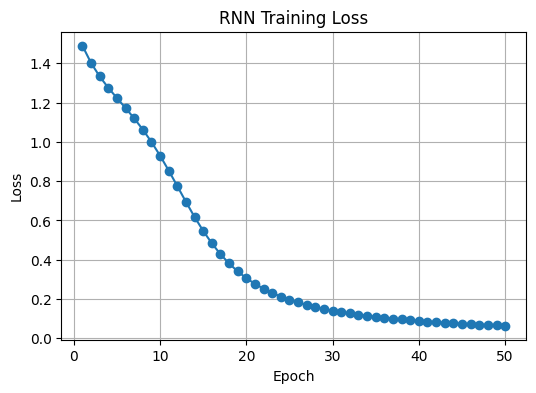

=== After train ===

--- Step t=1 ---
x[1].T = [[1. 0. 0. 0.]]
net[1].T = [[ 1.505229 -1.393148]]
h[1].T = [[ 0.906089 -0.883862]]
o[1].T = [[-1.511548  2.823844 -0.664275 -0.639131]]
y[1].T = [[0.012183 0.93024  0.028427 0.02915 ]]

--- Step t=2 ---
x[2].T = [[0. 1. 0. 0.]]
net[2].T = [[-1.910841 -1.282042]]
h[2].T = [[-0.957156 -0.857028]]
o[2].T = [[-1.624807 -0.053579  3.109348 -2.156635]]
y[2].T = [[0.008322 0.040049 0.94674  0.004889]]

--- Step t=3 ---
x[3].T = [[0. 0. 1. 0.]]
net[3].T = [[0.992018 1.782976]]
h[3].T = [[0.758221 0.945014]]
o[3].T = [[-1.257694  0.307393 -1.748973  3.380569]]
y[3].T = [[0.009111 0.043578 0.005574 0.941737]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. UTILS ---
def get_one_hot(char, vocab=['d','e','m','o']):
    vec = np.zeros((len(vocab), 1))
    char_to_ix = { ch:i for i,ch in enumerate(vocab) }
    vec[char_to_ix[char]] = 1
    return vec

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0, keepdims=True)

def cross_entropy_loss(y_hat, y_true):
    return -np.sum(y_true * np.log(y_hat + 1e-12))  # ln + epsilon

# --- 2. RNN FORWARD ---
def rnn_forward(sequence, W_hx, W_hh, b_h, W_qh, b_q):
    h_prev = np.zeros((W_hh.shape[0],1))
    x_list, net_list, h_list, o_list, y_list = [], [], [], [], []

    for char in sequence:
        x_t = get_one_hot(char)
        net_t = np.dot(W_hx, x_t) + np.dot(W_hh, h_prev) + b_h
        h_t = np.tanh(net_t)
        o_t = np.dot(W_qh, h_t) + b_q
        y_t = softmax(o_t)

        x_list.append(x_t)
        net_list.append(net_t)
        h_list.append(h_t)
        o_list.append(o_t)
        y_list.append(y_t)
        h_prev = h_t

    return x_list, net_list, h_list, o_list, y_list

# --- 3. RNN BACKWARD (BPTT) ---
def rnn_backward(x_list, net_list, h_list, y_list, targets, W_qh, W_hh, b_h):
    T = len(x_list)
    dW_hx = np.zeros_like(W_hx)
    dW_hh = np.zeros_like(W_hh)
    db_h   = np.zeros_like(b_h)
    dW_qh  = np.zeros_like(W_qh)
    db_q   = np.zeros((W_qh.shape[0],1))
    dh_next = np.zeros((W_hh.shape[0],1))

    for t in reversed(range(T)):
        y_true = get_one_hot(targets[t])
        delta_q = y_list[t] - y_true        # softmax + cross-entropy
        dW_qh += np.dot(delta_q, h_list[t].T)
        db_q  += delta_q

        dh = np.dot(W_qh.T, delta_q) + dh_next
        dz = dh * (1 - h_list[t]**2)
        db_h += dz
        dW_hx += np.dot(dz, x_list[t].T)
        h_prev_t = h_list[t-1] if t > 0 else np.zeros_like(h_list[0])
        dW_hh += np.dot(dz, h_prev_t.T)
        dh_next = np.dot(W_hh.T, dz)

    # Average gradient over T
    dW_hx /= T
    dW_hh /= T
    db_h   /= T
    dW_qh  /= T
    db_q   /= T

    return dW_hx, dW_hh, db_h, dW_qh, db_q

# --- 4. UPDATE WEIGHTS ---
def update_weights(W_hx, W_hh, b_h, W_qh, b_q,
                   dW_hx, dW_hh, db_h, dW_qh, db_q,
                   lr=0.1):
    W_hx -= lr * dW_hx
    W_hh -= lr * dW_hh
    b_h   -= lr * db_h
    W_qh -= lr * dW_qh
    b_q   -= lr * db_q
    return W_hx, W_hh, b_h, W_qh, b_q

# --- 5. TRAINING LOOP ---
def train_rnn(sequence, targets, W_hx, W_hh, b_h, W_qh, b_q,
              epochs=100, lr=0.1):
    loss_history = []

    for epoch in range(1, epochs+1):
        # forward
        x_list, net_list, h_list, o_list, y_list = rnn_forward(sequence, W_hx, W_hh, b_h, W_qh, b_q)
        # compute loss
        loss = 0
        for t in range(len(sequence)):
            y_true = get_one_hot(targets[t])
            loss += cross_entropy_loss(y_list[t], y_true)
        loss /= len(sequence)
        loss_history.append(loss)

        # backward
        dW_hx, dW_hh, db_h, dW_qh, db_q = rnn_backward(x_list, net_list, h_list, y_list, targets, W_qh, W_hh, b_h)

        # update weights
        W_hx, W_hh, b_h, W_qh, b_q = update_weights(W_hx, W_hh, b_h, W_qh, b_q,
                                                     dW_hx, dW_hh, db_h, dW_qh, db_q,
                                                     lr)

        if epoch % 10 == 0 or epoch == 1:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

    # plot loss
    plt.figure(figsize=(6,4))
    plt.plot(range(1, epochs+1), loss_history, marker='o')
    plt.title("RNN Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    return W_hx, W_hh, b_h, W_qh, b_q

# --- 6. INITIAL WEIGHTS ---
W_hx = np.array([[ 0.5, -0.3,  0.1,  0.2],
                 [-0.2,  0.4,  0.3, -0.1]])
W_hh = np.array([[0.1, 0.2],
                 [0.0, 0.3]])
b_h  = np.array([[0.05],[-0.02]])
W_qh = np.array([[ 0.3, 0.1],
                 [-0.2, 0.4],
                 [ 0.1,-0.3],
                 [ 0.2, 0.2]])
b_q  = np.array([[0.01],[-0.03],[0.02],[0.0]])

sequence = ['d','e','m']
targets  = ['e','m','o']

# --- 7. TRAIN RNN ---
W_hx, W_hh, b_h, W_qh, b_q = train_rnn(sequence, targets, W_hx, W_hh, b_h, W_qh, b_q,
                                        epochs=50, lr=0.5)

x_list, net_list, h_list, o_list, y_hat_list = rnn_forward(sequence, W_hx, W_hh, b_h, W_qh, b_q)
print("=== After train ===")
for t in range(len(x_list)):
    print(f"\n--- Step t={t+1} ---")
    print(f"x[{t+1}].T = {x_list[t].T}")
    print(f"net[{t+1}].T = {net_list[t].T}")
    print(f"h[{t+1}].T = {h_list[t].T}")
    print(f"o[{t+1}].T = {o_list[t].T}")
    print(f"y[{t+1}].T = {y_hat_list[t].T}")

# 2.4.3 Vanishing/Exploding Gradient Analysis

Restating: in backward recursion, the term $\frac{\partial L}{\partial \mathrm{net}_t}$ is used to perform the global recursive computation over time from $T \to 1$.

This term can be expanded into:

$$
\frac{\partial L}{\partial \mathrm{net}_t}
= \frac{\partial L_t}{\partial \mathrm{net}_t}
+ \sum_{i=t+1}^{T}
\frac{\partial L_i}{\partial \mathrm{net}_i}
\left( \prod_{j=t}^{i-1}
\frac{\partial \mathrm{net}_{j+1}}{\partial \mathrm{net}_j}
\right)
$$

$$
= \frac{\partial L_t}{\partial \mathrm{net}_t}
+ \sum_{i=t+1}^{T}
\left( \prod_{j=t}^{i-1}
\frac{\partial \mathrm{net}_{j+1}}{\partial \mathrm{net}_j}
\right)^{\top}
\frac{\partial L_i}{\partial \mathrm{net}_i}
$$

$$
= \frac{\partial L_t}{\partial \mathrm{net}_t}
+ \sum_{i=t+1}^{T}
\left( \prod_{j=t}^{i-1}
\frac{\partial \mathrm{net}_{j+1}}{\partial h_j}\,
\frac{\partial h_j}{\partial \mathrm{net}_j}
\right)^{\top}
\frac{\partial L_i}{\partial \mathrm{net}_i}
$$

$$
= \frac{\partial L_t}{\partial \mathrm{net}_t}
+ \sum_{i=t+1}^{T}
\left( \prod_{j=t}^{i-1} W_{hh} \right)^{\top}
\left( \prod_{j=t}^{i-1} \varphi'(\mathrm{net}_j) \right)^{\top}
\frac{\partial L_i}{\partial \mathrm{net}_i}
$$

$$
= \frac{\partial L_t}{\partial \mathrm{net}_t}
+ \sum_{i=t+1}^{T}
\left( W_{hh}^{\,i-t} \right)^{\top}
\left( \prod_{j=t}^{i-1} \varphi'(\mathrm{net}_j) \right)^{\top}
\frac{\partial L_i}{\partial \mathrm{net}_i} \tag{27}
$$

Observing the above formula, $\frac{\partial L}{\partial \mathrm{net}_t}$  contains $(W_{hh}^{\,i-t})^{\top}$, When i approaches T at time indices far from t, the term $(W_{hh}^{\,i-t})^{\top}$ has the exponent (i-t) growing very large. To analyze and discuss what happens when the power of a matrix becomes large, our group will solve exercises to clarify these issues.

## Exercise 1

Let $\mathbf{M} \in \mathbb{R}^{n \times n}$ be a **symmetric** matrix with eigenvalues $\lambda_i$ and corresponding eigenvectors $\mathbf{v}_i$, ordered as $|\lambda_1| \ge |\lambda_2| \ge \cdots \ge |\lambda_n|$.

### 1.1
Show that $\mathbf{M}^k$ has eigenvalues $\lambda_i^k$.

Since $ \mathbf{M} $ is symmetric, it has has n real eigenvalues $ \lambda_i $, and n orthonormal eigenvectors $ \mathbf{v}_i $, we have:

- $\mathbf{V} = [\mathbf{v}_1, \dots, \mathbf{v}_n]$ is an orthonormal matrix, with:
$$
\mathbf{v}_i^\top \mathbf{v}_j =
\begin{cases}
1, & i = j, \\
0, & i \ne j.
\end{cases}
$$
- $|\lambda_1| \ge |\lambda_2| \ge \cdots \ge |\lambda_n|$

+ We have $M v_i = \lambda_i v_i$. (1)

Purpose: Prove by induction that $M^k v_i = \lambda_i^k v_i$

From (1):

$$
M^2 v_i = M(M v_i) = M(\lambda_i v_i)
= \lambda_i (M v_i)
= \lambda_i (\lambda_i v_i)
= \lambda_i^2 v_i.
$$

Suppose the expression is true for $k$:

$$
M^k v_i = \lambda_i^k v_i.
$$

We check for $k+1$:

$$
M^{k+1} v_i
= M(M^k v_i)
= M(\lambda_i^k v_i)
= \lambda_i^k (M v_i)
= \lambda_i^k (\lambda_i v_i)
= \lambda_i^{k+1} v_i.
$$

So for all $k \in \mathbb{N}$, $v_i$ is still an eigenvector of $M^k$
with eigenvalue:

$$
\lambda_i^k.
$$



The above proof admits an orthonormal eigenbasis (spectral theorem):

$$
\mathbf{M} = \mathbf{V} \Lambda \mathbf{V}^\top,
$$

where


- $\Lambda = \mathrm{diag}(\lambda_1, \dots, \lambda_n)$


Raising $\mathbf{M}$ to the $k$-th power:

$$
\mathbf{M}^k
= (\mathbf{V} \Lambda \mathbf{V}^\top)^k
= \mathbf{V} \Lambda^k \mathbf{V}^\top,
$$

and

$$
\Lambda^k = \mathrm{diag}(\lambda_1^k, \dots, \lambda_n^k).
$$

With:

**$\text{diag}(\lambda_1^k, \ldots, \lambda_n^k)$** is a diagonal matrix


$$
\Lambda^k =
\begin{bmatrix}
\lambda_1^k & 0 & 0 & \cdots & 0 \\
0 & \lambda_2^k & 0 & \cdots & 0 \\
0 & 0 & \lambda_3^k & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \lambda_n^k
\end{bmatrix}.
$$

Thus, $ \mathbf{M}^k $ has the **same eigenvectors** and **eigenvalues $ \lambda_i^k $**.

### 1.2
Show that for a random vector $\mathbf{x}$, with high probability,
$\mathbf{M}^k \mathbf{x}$ becomes almost aligned with the principal eigenvector $\mathbf{v}_1$ as $k \to \infty$.

#### Projection and Expansion of a Vector \(x\)

Let \(V\) be the matrix containing the eigenvectors:
$$
V = [\, v_1 \;\; v_2 \;\; \cdots \;\; v_n \,].
$$

Since the eigenvectors are orthonormal,
$$
V^\top V = I.
$$

For any vector $(x \in \mathbb{R}^n)$, define the projection coefficients:
$$
d_i = v_i^\top x.
$$

We can express \(x\) using the eigenbasis:
$$
x = \sum_{i=1}^n (v_i^\top x) \, v_i.
$$

**Proof:**

1. Write the expansion:
   $$
   x = \sum_{i=1}^n c_i v_i.
   $$

2. Multiply both sides by $v_j^\top$:
   $$
   v_j^\top x = \sum_{i=1}^n c_i (v_j^\top v_i).
   $$

3. Using orthonormality,
   $$
   v_j^\top v_i =
   \begin{cases}
   1, & i=j,\\
   0, & i\neq j,
   \end{cases}
   $$

4. Hence,
   $$
   v_j^\top x = c_j.
   $$

Therefore,
$$
c_j = v_j^\top x,
$$
and the expansion becomes:
$$
x = \sum_{i=1}^n (v_i^\top x)\, v_i.
$$

This shows that any vector \(x\) can be uniquely expanded in the orthonormal eigenbasis.


#### \(M^k\) to the Expansion of \(x\)

Since
$$
M v_i = \lambda_i v_i,
$$
raising both sides to the \(k\)-th power gives:
$$
M^k v_i = \lambda_i^k v_i.
$$

Using the eigenbasis expansion,
$$
x = \sum_{i=1}^n (v_i^\top x)\, v_i,
$$
we obtain:
$$
M^k x
= M^k \left( \sum_{i=1}^n (v_i^\top x)\, v_i \right)
= \sum_{i=1}^n (v_i^\top x)\, M^k v_i
= \sum_{i=1}^n (v_i^\top x)\, \lambda_i^k v_i.
$$

This shows:

- The eigenvectors remain unchanged under powers of \(M\).
- The eigenvalues are raised to the \(k\)-th power.

This is the core of the spectral theorem and forms the basis for power iteration and many numerical methods.







### Alignment of $ \mathbf{M}^k \mathbf{x} $ with $ \mathbf{v}_1 $

Any vector $ \mathbf{x} \in \mathbb{R}^n $ can be expanded in the eigenbasis:

$$
\mathbf{x} = \sum_{i=1}^n \alpha_i \mathbf{v}_i,
\qquad
\alpha_i = \mathbf{v}_i^\top \mathbf{x}.
$$

Apply $\mathbf{M}^k$:

$$
\mathbf{M}^k \mathbf{x}
= \sum_{i=1}^n \alpha_i \lambda_i^k \mathbf{v}_i.
$$

Factor the dominant eigenvalue term:

$$
\mathbf{M}^k \mathbf{x}
= \lambda_1^k
\left(
\alpha_1 \mathbf{v}_1
+
\sum_{i=2}^n \alpha_i
\left( \frac{\lambda_i}{\lambda_1} \right)^k
\mathbf{v}_i
\right).
$$

Since $ |\lambda_i / \lambda_1| < 1 $ for all $ i \ge 2 $:

$$
\left( \frac{\lambda_i}{\lambda_1} \right)^k \to 0
\quad \text{as } k \to \infty.
$$

Thus:

$$
\mathbf{M}^k \mathbf{x}
\approx
\lambda_1^k \alpha_1 \mathbf{v}_1.
$$

Normalize to examine direction:

$$
\frac{\mathbf{M}^k \mathbf{x}}{\| \mathbf{M}^k \mathbf{x} \|}
\to
\pm \mathbf{v}_1.
$$

### Formal statement

If $ \mathbf{x} $ is drawn from any continuous distribution, then  
$ \mathbb{P}(\alpha_1 \neq 0) = 1 $.

Hence:

$$
\boxed{
\mathbb{P}
\left(
\lim_{k \to \infty}
\frac{\mathbf{M}^k \mathbf{x}}{\| \mathbf{M}^k \mathbf{x} \|}
=
\pm \mathbf{v}_1
\right)
= 1.
}
$$
**Conclusion:**  
If the matrix $\mathbf{M}$ is symmetric, then its behavior under powers $\mathbf{M}^k$  is determined entirely by its eigenvectors and by the largest absolute eigenvalue  $|\lambda_1|$.



### 1.3
What does the above result imply for **gradients in RNNs**?

### Implications for RNN gradients

During backpropagation through time, RNN gradients involve repeated multiplication:

$$
\frac{\partial h_t}{\partial h_{t-k}}
\approx
\left( W_{hh}^\top \right)^k.
$$

Thus the gradient behaves like:

$$
\mathbf{M}^k,
\qquad \text{where } \mathbf{M} \approx W_{hh}^\top.
$$

Eigenvalue analysis shows:

- If $ |\lambda_1| < 1 $ → gradient **vanishes**  
- If $ |\lambda_1| > 1 $ → gradient **explodes**  
- Gradient direction collapses to the principal eigenvector → **loss of long-term information**

This explains the classical **vanishing/exploding gradient problem** in simple RNNs.


### **Final Summary**

- $ \mathbf{M}^k $ has eigenvalues $ \lambda_i^k $  
- $ \mathbf{M}^k \mathbf{x} $ aligns with the dominant eigenvector  
- RNN gradients behave the same way → instability unless eigenvalues are controlled  

## Exercise 2

Besides **gradient clipping**, propose **other methods** to cope with  
**exploding gradients** in recurrent neural networks.

## 1. Using Singular Values Instead of Eigenvalues

### If \(M\) is symmetric:
It admits the decomposition
$$
M = Q \Lambda Q^\top,
$$
and
$$
\|M^k\|_2 = |\lambda_1|^k.
$$

So **eigenvalues** fully determine exploding or vanishing gradients.

---

### But in practice, the matrix \(M\) is NOT symmetric:
- Eigenvalues may be **complex**
- Eigenvectors are **not orthogonal**
- They may **not form a full basis**

Hence:

> **Eigenvalues do *not* describe the amplification behavior of a non-symmetric matrix.**

---

### Solution: Use Singular Value Decomposition (SVD)

$$
M = U \Sigma V^\top,
$$

where

$$
\Sigma = \mathrm{diag}(\sigma_1, \sigma_2, \ldots, \sigma_n),\quad
\sigma_1 \ge \sigma_2 \ge \dots \ge 0.
$$

Then:

$$
\|M\|_2 = \sigma_1,
$$

and across time:

$$
\|M^k\|_2 \approx \sigma_1^k.
$$

➡ **The largest singular value $\sigma_1\$ determines exploding/vanishing gradients**,  not eigenvalues.


## 2. Spectral Normalization (SN) Applied to Matrix M

### Goal:
Ensure that the recurrent/update matrix satisfies
$$
\sigma_1(M) \le r, \quad (r \approx 1).
$$

If:
- $\sigma_1(M) > 1$ → gradients explode  
- $\sigma_1(M) < 1$ → gradients vanish  

Thus:

$$
\sigma_1(M) \le 1.
$$


## Algorithm (Using Power Iteration)

### Step 1 — Estimate the largest singular value
Using one step of power iteration:

$$
u \leftarrow \frac{Mv}{\|Mv\|}, \qquad
v \leftarrow \frac{M^\top u}{\|M^\top u\|},
$$

Approximation:

$$
\sigma_1 \approx u^\top M v.
$$


### Step 2 — Normalize the matrix
If \(r = 1\):

$$
M_{\text{new}} = \frac{M}{\max(1, \sigma_1)}.
$$

This ensures:

$$
\sigma_1(M_{\text{new}}) \le 1.
$$


### Why this works:
It prevents gradients from blowing up by fixing **the true amplification factor** of the matrix.


## 3. Numerical Example

Let the matrix \(M\) be:

$$
M =
\begin{bmatrix}
2 & 1 \\
0 & 0.5
\end{bmatrix}.
$$

Eigenvalues:
- $\lambda_1 = 2$
- $\lambda_2 = 0.5$

But because \(M\) is **non-symmetric**, eigenvalues do NOT determine the growth of \(\|M^k\|\).

Let's compute singular values and apply Spectral Normalization.


In [ ]:
import numpy as np

# Define M
M = np.array([
    [2.0, 1.0],
    [0.0, 0.5]
])

print("M =\n", M)

# Compute singular values
sigma = np.linalg.svd(M, compute_uv=False)
sigma1 = sigma[0]

print("\nSingular values:", sigma)
print("Largest singular value σ1 =", sigma1)

# Apply spectral normalization
M_sn = M / max(1, sigma1)   # r = 1

print("\nAfter spectral normalization:")
print("M_sn =\n", M_sn)

# Compute new singular values
sigma_sn = np.linalg.svd(M_sn, compute_uv=False)
print("\nNew singular values:", sigma_sn)


M =
 [[2.  1. ]
 [0.  0.5]]

Singular values: [2.24767902 0.44490338]
Largest singular value σ1 = 2.247679020649623

After spectral normalization:
M_sn =
 [[0.88980677 0.44490338]
 [0.         0.22245169]]

New singular values: [1.         0.19793902]


# Truncation
In RNN, processing very long sequences (e.g., thousands of time steps) presents two critical challenges: memory exhaustion (storing the entire computation graph) and numerical instability (vanishing or exploding gradients due to repeated matrix multiplication).

To address this, standard implementations utilize Truncated Backpropagation Through Time (TBPTT). This technique decouples the forward pass from the backward pass dynamics.


1.   The Mechanism

      *  Forward Pass (Continuous): The network processes the data in smaller chunks (e.g., window size $k_1$). Crucially, the final hidden state of the previous chunk is carried over as the initial state of the next chunk. This ensures the model retains "memory" of the entire sequence context.
      *   Backward Pass (Truncated): During backpropagation, the gradient flow is explicitly cut off after a fixed number of steps ($k_2$). We "detach" the history, effectively assuming that the gradient contribution from time steps prior to the current window is zero.
2.   Mathematical Implication
      *   Idea: Do not backprop for entire time,but only backprop for a small time of the k most recent steps.
      *   Instead of calculating:
      \begin{aligned}
      \frac{\partial L}{\partial W_{hx}}
      &=  \sum_{t=1}^T \frac{\partial L_t}{\partial W}
      \end{aligned}
      *   We calculate:
      \begin{aligned}
      \frac{\partial L}{\partial W_{hx}}
      &=  \sum_{t=T-k+1}^T \frac{\partial L_t}{\partial W}
      \end{aligned}

3.   Two common types of truncation
      *   Fixed Truncation

      We choose fixed k.

      For example: k=20 -> We backdrop for 20 steps only.

      *   Randomized Truncation

      k is not fixed but random for each batch.
2.   The Trade-off

While truncation makes training computationally feasible and stabilizes gradients, it introduces a limitation: the model loses the ability to learn long-term dependencies that exceed the truncation window length.



# Note:
*  **Partial Derivative** ($\partial$): Measures the immediate and isolated impact of the weight on the current state (step $t$), assuming the previous history ($h_{t-1}$) is held constant and does not change.
*  **Total Derivative** ($d$): Measures the cumulative and recursive impact of the weight over time, combining the explicit gradient contribution at step $t$ with the indirect gradients propagated through the temporal dependencies of all previous states ($t-1, t-2, \dots$). However, in Deep Learning, the final result is still conventionally denoted as $\frac{\partial L}{\partial W}$.


# References:

1.	Zhang, A., Lipton, Z. C., Li, M., & Smola, A. (2020). Backpropagation Through Time. Dive into Deep Learning. Retrieved from https://d2l.ai/chapter_recurrent-neural-networks/bptt.html
2.	Pham Dinh Khanh. (2021). Giải tích tích phân — Chương Phụ lục Giải tích & Vi phân. Deep AI KhanhBlog. Retrieved from https://phamdinhkhanh.github.io/deepai-book/ch_calculus/appendix_calculus.html
3.	NTTuan. Bài 13: Recurrent Neural Network (RNN). Retrieved from: https://nttuan8.com/bai-13-recurrent-neural-network/. (Retrieved on: 11/12/2025])
4.	Varma, S., & Das, S. (2018). Chapter 13: Recurrent Neural Networks, in Deep Learning. Retrieved from https://srdas.github.io/DLBook/RNNs.html
5.	G. Strang, Introduction to Linear Algebra, 6th ed. Wellesley, MA: Wellesley-Cambridge Press, 2016.
